# Lending Club Case Study

**Contributors** - Thamilvaanan T


###### Problem Statement

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


###### Objective of this case study

Study the past loan applications data and understand the driving factors behind loan default (i.e. the variables which are strong indicators of default) to facilitate the loan approval decisions when the company receives a new loan application. 
The study should help to identify if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


### Approach

- Data understanding 
    - Go through the Data dictionary, observe data values, study data segments
- Data cleaning
    - Remove columns which are invalid, has high percentage of null data
    - Remove rows with high null data
    - Fix data types, suffixes and prefixes etc.
- Data Analysis
    - Univariate Analysis
    - Segmented Univariate Analysis
    - Bivariate Analysis

- Recommendations
   - Identify major variables which influence the loan default status to provide recommendation on approving and rejecting loans.


In [1540]:
#import project dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore') # Ignore warnings due to version mismatch

In [1541]:
# Load data from CSV with Pandas
loan_data = pd.read_csv("loan.csv", low_memory=False)
data_dict = pd.read_excel('Data_Dictionary.xlsx', sheet_name='LoanStats')
data_dict_rejectStats = pd.read_excel('Data_Dictionary.xlsx', sheet_name='RejectStats')

In [1542]:
# view top rows
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000        4975.0000          36 months   
1  1077430  1314167    2500       2500        2500.0000          60 months   
2  1077175  1313524    2400       2400        2400.0000          36 months   
3  1076863  1277178    10000      10000       10000.0000         36 months   
4  1075358  1311748    3000       3000        3000.0000          60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0  10.65%  162.8700      B     B2        NaN                       10+ years   
1  15.27%  59.8300       C     C4        Ryder                     < 1 year    
2  15.96%  84.3300       C     C5        NaN                       10+ years   
3  13.49%  339.3100      C     C1        AIR RESOURCES BOARD       10+ years   
4  12.69%  67.7900       B     B5        University Medical Group  1 year      

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0  RENT          24000.0000   Verified            Dec-11  Fully Paid    
1  RENT          30000.0000   Source Verified     Dec-11  Charged Off   
2  RENT          12252.0000   Not Verified        Dec-11  Fully Paid    
3  RENT          49200.0000   Source Verified     Dec-11  Fully Paid    
4  RENT          80000.0000   Source Verified     Dec-11  Current       

  pymnt_plan  \
0  n           
1  n           
2  n           
3  n           
4  n           

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2  NaN                                                                                                                                                                                                                                                                                                          

In [1543]:
#verify shape of the data ( number of columns and rows)
loan_data.shape

(39717, 111)

In [1544]:
# List all columns and check is there any leading and/or trailing spcaces special charators etc.
print(loan_data.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [1545]:
# Update Default Pandas options for complete display of all columns without truncating
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

# Set Precisions
pd.set_option('precision', 8)
pd.options.display.float_format = '{:.4f}'.format

In [1546]:
# View Summary on the Columns Data Types
loan_data.info( max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

In [1547]:
# Display the column descriptions from Data Dictionary
data_dict

LoanStatNew  \
0    acc_now_delinq                   
1    acc_open_past_24mths             
2    addr_state                       
3    all_util                         
4    annual_inc                       
5    annual_inc_joint                 
6    application_type                 
7    avg_cur_bal                      
8    bc_open_to_buy                   
9    bc_util                          
10   chargeoff_within_12_mths         
11   collection_recovery_fee          
12   collections_12_mths_ex_med       
13   delinq_2yrs                      
14   delinq_amnt                      
15   desc                             
16   dti                              
17   dti_joint                        
18   earliest_cr_line                 
19   emp_length                       
20   emp_title                        
21   fico_range_high                  
22   fico_range_low                   
23   funded_amnt                      
24   funded_amnt_inv                  
25   grade                            
26   home_ownership                   
27   id                               
28   il_util                          
29   initial_list_status              
30   inq_fi                           
31   inq_last_12m                     
32   inq_last_6mths                   
33   installment                      
34   int_rate                         
35   issue_d                          
36   last_credit_pull_d               
37   last_fico_range_high             
38   last_fico_range_low              
39   last_pymnt_amnt                  
40   last_pymnt_d                     
41   loan_amnt                        
42   loan_status                      
43   max_bal_bc                       
44   member_id                        
45   mo_sin_old_il_acct               
46   mo_sin_old_rev_tl_op             
47   mo_sin_rcnt_rev_tl_op            
48   mo_sin_rcnt_tl                   
49   mort_acc                         
50   mths_since_last_delinq           
51   mths_since_last_major_derog      
52   mths_since_last_record           
53   mths_since_rcnt_il               
54   mths_since_recent_bc             
55   mths_since_recent_bc_dlq         
56   mths_since_recent_inq            
57   mths_since_recent_revol_delinq   
58   next_pymnt_d                     
59   num_accts_ever_120_pd            
60   num_actv_bc_tl                   
61   num_actv_rev_tl                  
62   num_bc_sats                      
63   num_bc_tl                        
64   num_il_tl                        
65   num_op_rev_tl                    
66   num_rev_accts                    
67   num_rev_tl_bal_gt_0              
68   num_sats                         
69   num_tl_120dpd_2m                 
70   num_tl_30dpd                     
71   num_tl_90g_dpd_24m               
72   num_tl_op_past_12m               
73   open_acc                         
74   open_acc_6m                      
75   open_il_12m                      
76   open_il_24m                      
77   open_il_6m                       
78   open_rv_12m                      
79   open_rv_24m                      
80   out_prncp                        
81   out_prncp_inv                    
82   pct_tl_nvr_dlq                   
83   percent_bc_gt_75                 
84   policy_code                      
85   pub_rec                          
86   pub_rec_bankruptcies             
87   purpose                          
88   pymnt_plan                       
89   recoveries                       
90   revol_bal                        
91   revol_util                       
92   sub_grade                        
93   tax_liens                        
94   term                             
95   title                            
96   tot_coll_amt                     
97   tot_cur_bal                      
98   tot_hi_cred_lim                  
99   total_acc                        
100  total_bal_ex_mort                
101  total_bal_il                     
102  to

In [1548]:
# Data summary before cleanup
loan_data.describe()

id    member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count 39717.0000   39717.0000   39717.0000 39717.0000   39717.0000         
mean  683131.9131  850463.5594  11219.4438 10947.7132   10397.4489         
std   210694.1329  265678.3074  7456.6707  7187.2387    7128.4504          
min   54734.0000   70699.0000   500.0000   500.0000     0.0000             
25%   516221.0000  666780.0000  5500.0000  5400.0000    5000.0000          
50%   665665.0000  850812.0000  10000.0000 9600.0000    8975.0000          
75%   837755.0000  1047339.0000 15000.0000 15000.0000   14400.0000         
max   1077501.0000 1314167.0000 35000.0000 35000.0000   35000.0000         

       installment   annual_inc        dti  delinq_2yrs  inq_last_6mths  \
count 39717.0000   39717.0000   39717.0000 39717.0000   39717.0000        
mean  324.5619     68968.9264   13.3151    0.1465       0.8692            
std   208.8749     63793.7658   6.6786     0.4918       1.0702            
min   15.6900      4000.0000    0.0000     0.0000       0.0000            
25%   167.0200     40404.0000   8.1700     0.0000       0.0000            
50%   280.2200     59000.0000   13.4000    0.0000       1.0000            
75%   430.7800     82300.0000   18.6000    0.0000       1.0000            
max   1305.1900    6000000.0000 29.9900    11.0000      8.0000            

       mths_since_last_delinq  mths_since_last_record   open_acc    pub_rec  \
count 14035.0000              2786.0000               39717.0000 39717.0000   
mean  35.9010                 69.6981                 9.2944     0.0551       
std   22.0201                 43.8225                 4.4003     0.2372       
min   0.0000                  0.0000                  2.0000     0.0000       
25%   18.0000                 22.0000                 6.0000     0.0000       
50%   34.0000                 90.0000                 9.0000     0.0000       
75%   52.0000                 104.0000                12.0000    0.0000       
max   120.0000                129.0000                44.0000    4.0000       

        revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
count 39717.0000  39717.0000 39717.0000 39717.0000     39717.0000     
mean  13382.5281  22.0888    51.2279    50.9898        12153.5965     
std   15885.0166  11.4017    375.1728   373.8245       9042.0408      
min   0.0000      2.0000     0.0000     0.0000         0.0000         
25%   3703.0000   13.0000    0.0000     0.0000         5576.9300      
50%   8850.0000   20.0000    0.0000     0.0000         9899.6403      
75%   17058.0000  29.0000    0.0000     0.0000         16534.4330     
max   149588.0000 90.0000    6311.4700  6307.3700      58563.6799     

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count 39717.0000       39717.0000       39717.0000     39717.0000            
mean  11567.1491       9793.3488        2263.6632      1.3630                
std   8942.6726        7065.5221        2608.1120      7.2900                
min   0.0000           0.0000           0.0000         0.0000                
25%   5112.3100        4600.0000        662.1800       0.0000                
50%   9287.1500        8000.0000        1348.9100      0.0000                
75%   15798.8100       13653.2600       2833.4000      0.0000                
max   58563.6800       35000.0200       23563.6800     180.2000              

       recoveries  collection_recovery_fee  last_pymnt_amnt  \
count 39717.0000  39717.0000               39717.0000         
mean  95.2216     12.4061                  2678.8262          
std   688.7448    148.6716                 4447.1360          
min   0.0000      0.0000                   0.0000             
25%   0.0000      0.0000                   218.6800           
50%   0.0000      0.0000                   546.1400           
75%   0.0000      0.0000                   3293.1600          
max   29623.3500  7002.1900                36115.2000         

       collections_12_mths_ex_me

In [1549]:
loan_data.nunique().sort_values()

verification_status_joint         0    
bc_util                           0    
bc_open_to_buy                    0    
avg_cur_bal                       0    
acc_open_past_24mths              0    
inq_last_12m                      0    
total_cu_tl                       0    
inq_fi                            0    
total_rev_hi_lim                  0    
all_util                          0    
max_bal_bc                        0    
mo_sin_old_il_acct                0    
open_rv_24m                       0    
il_util                           0    
total_bal_il                      0    
mths_since_rcnt_il                0    
open_il_24m                       0    
open_il_12m                       0    
open_il_6m                        0    
open_acc_6m                       0    
tot_cur_bal                       0    
tot_coll_amt                      0    
total_bc_limit                    0    
open_rv_12m                       0    
mo_sin_old_rev_tl_op              0    


### Data cleaning 

##### Data cleaning - Columns

### Drop the customer behavior variables which were not available at the time of loan application, and thus they should not be used as predictors for credit approval.

In [1550]:
loan_data = loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','next_pymnt_d'],axis=1)

In [1551]:
loan_data.shape

(39717, 89)

**Remove the columns which has less then 2 unique values as these columns will not influence the analysis**

In [1552]:
#List columns which has less than 2 unique values
num_of_unique = loan_data.nunique()
zero_or_one_uniuqe_colms = loan_data.columns[num_of_unique < 2]
zero_or_one_uniuqe_colms

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'nu

In [1553]:
#Remove columns which has less than 2 unique values as this cannot contribute to the analysis
loan_data.drop(zero_or_one_uniuqe_colms,axis=1, inplace=True)

In [1554]:
# Check the column data
loan_data.nunique().sort_values()

term                      2    
pub_rec_bankruptcies      3    
verification_status       3    
loan_status               3    
home_ownership            5    
grade                     7    
emp_length                11   
purpose                   14   
sub_grade                 35   
addr_state                50   
issue_d                   55   
mths_since_last_delinq    95   
mths_since_last_record    111  
int_rate                  371  
zip_code                  823  
loan_amnt                 885  
funded_amnt               1041 
dti                       2868 
annual_inc                5318 
funded_amnt_inv           8205 
installment               15383
title                     19615
desc                      26527
emp_title                 28820
url                       39717
member_id                 39717
id                        39717
dtype: int64

In [1555]:
loan_data.shape

(39717, 27)

In [1556]:
# List the sum of null values for each columns
#loan_data.isnull().sum().sort_values(ascending=False)

In [1557]:
# Get null values percentage for each columns
## ((Num of Null value rows of the column) / (total rows))  * 100
## round to 2 digits
total_rows = loan_data.index
round(loan_data.isnull().sum()/len(total_rows), 2)*100

id                       0.0000 
member_id                0.0000 
loan_amnt                0.0000 
funded_amnt              0.0000 
funded_amnt_inv          0.0000 
term                     0.0000 
int_rate                 0.0000 
installment              0.0000 
grade                    0.0000 
sub_grade                0.0000 
emp_title                6.0000 
emp_length               3.0000 
home_ownership           0.0000 
annual_inc               0.0000 
verification_status      0.0000 
issue_d                  0.0000 
loan_status              0.0000 
url                      0.0000 
desc                     33.0000
purpose                  0.0000 
title                    0.0000 
zip_code                 0.0000 
addr_state               0.0000 
dti                      0.0000 
mths_since_last_delinq   65.0000
mths_since_last_record   93.0000
pub_rec_bankruptcies     2.0000 
dtype: float64

**Remove the columns which mostly has null data**

In [1558]:
# List columns which has 65% or more null data
null_stat = loan_data.isnull().sum()
null_above_65percent = null_stat[(null_stat / len(total_rows)) > 0.65]
null_above_65percent.sort_values(ascending=False)

mths_since_last_record    36931
dtype: int64

In [1559]:
# Remove columns which has 65% or more null data
loan_data.drop(null_above_65percent.index,axis=1, inplace=True)
# Remaining columns after cleanup
loan_data.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'mths_since_last_delinq', 'pub_rec_bankruptcies'],
      dtype='object')

In [1560]:
loan_data.shape

(39717, 26)

In [1561]:
# Check if there any columns with all null data
(loan_data.isnull().sum()==loan_data.shape[0]).sum()

0

In [1562]:
# Remove any columns with all null data
loan_data.dropna(how='all',axis=1,inplace=True)

In [1563]:
loan_data.shape

(39717, 26)

In [1564]:
# Check the column data
loan_data.nunique().sort_values(ascending = False)

id                        39717
url                       39717
member_id                 39717
emp_title                 28820
desc                      26527
title                     19615
installment               15383
funded_amnt_inv           8205 
annual_inc                5318 
dti                       2868 
funded_amnt               1041 
loan_amnt                 885  
zip_code                  823  
int_rate                  371  
mths_since_last_delinq    95   
issue_d                   55   
addr_state                50   
sub_grade                 35   
purpose                   14   
emp_length                11   
grade                     7    
home_ownership            5    
verification_status       3    
loan_status               3    
pub_rec_bankruptcies      3    
term                      2    
dtype: int64

In [1565]:
# out_prncp_inv and out_prncp has only one unique value hence removing from data frame           
#loan_data.drop(['out_prncp_inv','out_prncp'], axis = 1, inplace = True)


##### Remove columns which may not influence the analysis

In [1566]:
loan_data[['desc', 'title', 'purpose']].head(10)

desc  \
0    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2  NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
3    Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>                                                                                                                                                                                                                                                                                                                                                                                                                             
4    Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills.  I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>                                                                                                                                                                                                                                                                                               
5  NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
6    Borrower added on 12/18/11 > I am planning on using the funds to pay off two retail credit cards with 24.99% interest rates, as well as a major bank credit card with a 18.99% rate.  I pay all my bills on time, looking for a lower combined payment and lower monthly payment.<br>                                                                                                                                

**purpose** is a categorical field which has more specfic and simpler value while **title**  seems to be the more descriptive value of the **purpose** field.

**desc** field has more details description about the loan and may not contribute much to this analysis.

Hence we can keep the **purpose** column while removing **desc** and **title** fields.


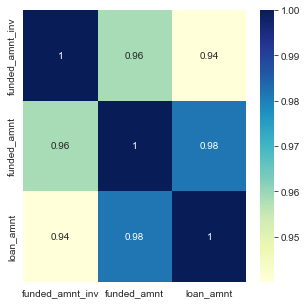

In [1567]:
plt.figure(figsize=(5,5))
sns.heatmap(loan_data[['funded_amnt_inv','funded_amnt','loan_amnt']].corr(),annot = True, cmap='YlGnBu')
plt.show()

While **funded_amnt_inv** column represends the actual loan amount; there are 2 other columns **funded_amnt** and **loan_amnt** which are similar and may not contribue the analysis uniquely as it's very much corelated to the **funded_amnt_inv** column.

Hence **funded_amnt_inv** can be kept and **funded_amnt** and **loan_amnt** can be removed.

In [1568]:
loan_data.nunique()[loan_data.nunique() == len(loan_data)]

id           39717
member_id    39717
url          39717
dtype: int64

##### Following 3 columns are identified as unique columns which are potential candicates for primary key
- **id** - A unique LC assigned ID for the loan listing
- **member_id** - A unique LC assigned Id for the borrower member.
- **url** - URL for the LC page with listing data.

###### Seems the **id** column can serve as unique idenfier for the loan applications.
###### While **member_id** and **url**  also unique fields but these won't contribute the analysis hence can be removed 


In [1569]:
loan_data.shape

(39717, 26)

In [1570]:
loan_data = loan_data.drop(['member_id','url','desc','title','funded_amnt' ,'loan_amnt'],axis=1)

In [1571]:
loan_data.shape

(39717, 20)

In [1572]:
# List the columns which has empty data and respective percentage of empty data
loan_data.isnull().sum()[loan_data.isnull().sum() != 0]*100/loan_data.shape[0]

emp_title                6.1913 
emp_length               2.7066 
mths_since_last_delinq   64.6625
pub_rec_bankruptcies     1.7549 
dtype: float64

In [1573]:
# mths_since_last_delinq has about 65%
loan_data = loan_data.drop(['mths_since_last_delinq'],axis=1)

In [1574]:
loan_data.shape

(39717, 19)

**Remove other columns which has less/no influence in the analysis**

In [1575]:
loan_data=loan_data.drop(['zip_code'],axis=1)


In [1576]:
loan_data.nunique().sort_values(ascending = False)

id                      39717
emp_title               28820
installment             15383
funded_amnt_inv         8205 
annual_inc              5318 
dti                     2868 
int_rate                371  
issue_d                 55   
addr_state              50   
sub_grade               35   
purpose                 14   
emp_length              11   
grade                   7    
home_ownership          5    
verification_status     3    
loan_status             3    
pub_rec_bankruptcies    3    
term                    2    
dtype: int64

#### Data cleaning - Rows

In [1577]:
# Check distinct loan status and respective count
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off    5627 
Current        1140 
Name: loan_status, dtype: int64

In [1578]:
#Remove the rows with loan_status "Current" as this should not be part of the analysis
loan_data = loan_data[loan_data['loan_status']!= 'Current']

In [1579]:
loan_data.shape

(38577, 18)

In [1580]:
## List columns with null values again
loan_data.isnull().sum()[loan_data.isnull().sum() != 0]

emp_title               2386
emp_length              1033
pub_rec_bankruptcies    697 
dtype: int64

###### Impute missing values with mode value
- Check distince value count for each column which has emtpy cells
- Find the mode of the distinct values
- Replace the missing cells with mode value

In [1581]:
loan_data['pub_rec_bankruptcies'].value_counts()

0.0000    36238
1.0000    1637 
2.0000    5    
Name: pub_rec_bankruptcies, dtype: int64

missing values will be replaced with **0.0**

In [1582]:
loan_data['pub_rec_bankruptcies'] = loan_data.pub_rec_bankruptcies.fillna(loan_data['pub_rec_bankruptcies'].mode()[0])

In [1583]:
loan_data['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [1584]:
# 10+ years is a mode value which is significant hence can be used to fill the missing values
loan_data['emp_length'] = loan_data.emp_length.fillna(loan_data['emp_length'].mode()[0])

In [1585]:
# Similarly update other columns with missing data with respecive modes when the mode data is significant.
#loan_data['revol_util'] = loan_data.revol_util.fillna(loan_data['revol_util'].mode()[0])

In [1586]:
loan_data['emp_title'].value_counts()

US Army                                                                           131
Bank of America                                                                   107
IBM                                                                               65 
AT&T                                                                              57 
Kaiser Permanente                                                                 56 
USAF                                                                              52 
Wells Fargo                                                                       52 
UPS                                                                               52 
US Air Force                                                                      51 
Walmart                                                                           45 
Lockheed Martin                                                                   42 
United States Air Force                               

There is no significant frequency for **emp_title** so there is no potential candicate value to replace the null values, hence leaving this column without replacing the null values.

###### Fix the data types


In [1587]:
# Check current columns data types
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   funded_amnt_inv       38577 non-null  float64
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_title             36191 non-null  object 
 8   emp_length            38577 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state         

###### Observation - Following columns should be numeric but these are currently of the type **object**
- int_rate
- emp_length


In [1588]:
# Observe values of these object type columns
loan_data[['int_rate', 'emp_length']].head(10)

int_rate emp_length
0   10.65%   10+ years
1   15.27%   < 1 year 
2   15.96%   10+ years
3   13.49%   10+ years
5   7.90%    3 years  
6   15.96%   8 years  
7   18.64%   9 years  
8   21.28%   4 years  
9   12.69%   < 1 year 
10  14.65%   5 years

**int_rate** has '%' symbol which need to be removed

In [1589]:
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '')


In [1590]:
# convert the data type of this columns to float
loan_data['int_rate'] = loan_data['int_rate'].astype(float)

In [1591]:
# Check the data after '%' removal
loan_data[['int_rate', 'emp_length']].head(10)

int_rate emp_length
0  10.6500    10+ years
1  15.2700    < 1 year 
2  15.9600    10+ years
3  13.4900    10+ years
5  7.9000     3 years  
6  15.9600    8 years  
7  18.6400    9 years  
8  21.2800    4 years  
9  12.6900    < 1 year 
10 14.6500    5 years

In [1592]:
loan_data.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

**emp_length** column has the suffix ' years' for all columns and it has 2 other distince values '< 1 year' and '10+ years'

Either we can create a new integer columns of this or we can map the current values to int type values. We are creating new column from emp_length data.

In [1593]:
loan_data["emp_length_num"] = loan_data.emp_length.replace({'10\+ years' : '10','< 1 year' :'0','1 year' : '1', ' years' : ''}, regex= True).astype('int')

In [1594]:
# Check data types of these columns after type conversion
print(loan_data.emp_length.dtype)
print(loan_data.int_rate.dtype)


object
float64


###### Outlier treatment 

In [1595]:
# annual_inc - The self-reported annual income provided by the borrower during registration.

# check percentils
loan_data.annual_inc.describe(percentiles=[0.15,0.25,0.5,0.75,0.85,0.90,0.95,0.97,0.98,0.99])

count   38577.0000  
mean    68777.9737  
std     64218.6818  
min     4000.0000   
15%     34000.0000  
25%     40000.0000  
50%     58868.0000  
75%     82000.0000  
85%     100000.0000 
90%     115000.0000 
95%     140004.0000 
97%     165000.0000 
98%     187000.0000 
99%     234144.0000 
max     6000000.0000
Name: annual_inc, dtype: float64

Text(0.5, 0, 'Distribution')

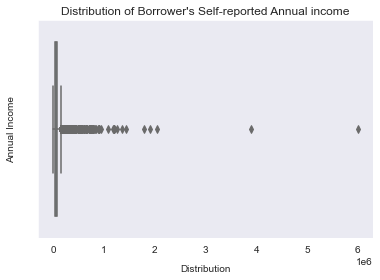

In [1596]:
# check the box plot for annual_inc
plt.title("Distribution of Borrower's Self-reported Annual income")
sns.boxplot(x = 'annual_inc', data = loan_data, palette="Set3")
plt.ylabel('Annual Income', labelpad = 15)
plt.xlabel('Distribution', labelpad = 10)

**Observation on Self-reported Annual income** 
- Based on the box plot and percertile distribution it's clear outliers exist in the distribution. Max Annual income is **6000000** which is much larger than (6000000/ 68777.9737  = 87.237 times) the mean value. 
- Further the Annual Income after 95 Percentile can be considered here as outliers as there is a clear disconnect.
- Hence the outlier rows to be dropped.


In [1597]:
# find the 95th percentile annual income and filter the data to remove outliers
quantile95 = loan_data.annual_inc.quantile(0.95)
loan_data  = loan_data[loan_data.annual_inc < quantile95]

In [1598]:
# check the percentile distributions and plot again
loan_data.annual_inc.describe(percentiles=[0.15,0.25,0.5,0.75,0.85,0.90,0.95,0.97,0.98,0.99])


count   36642.0000 
mean    60829.8311 
std     27717.8315 
min     4000.0000  
15%     33000.0000 
25%     40000.0000 
50%     56000.0000 
75%     77704.0500 
85%     91000.0000 
90%     100000.0000
95%     117000.0000
97%     123600.0000
98%     128478.6800
99%     135000.0000
max     140000.0000
Name: annual_inc, dtype: float64

Text(0.5, 0, 'Distribution')

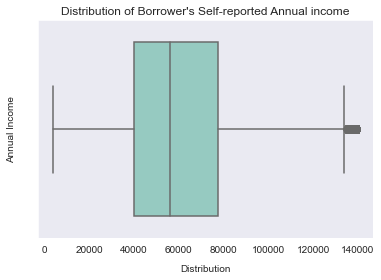

In [1599]:
plt.title("Distribution of Borrower's Self-reported Annual income")
sns.boxplot(x = 'annual_inc', data = loan_data, palette="Set3")
plt.ylabel('Annual Income', labelpad = 15)
plt.xlabel('Distribution', labelpad = 10)

In [1600]:
loan_data.shape

(36642, 19)

In [1601]:
# funded_amnt_inv() - The total amount committed by investors for that loan at that point in time.

# check percentils
loan_data.funded_amnt_inv.describe(percentiles=[0.15,0.25,0.5,0.75,0.85,0.90,0.95,0.97,0.98,0.99])

count   36642.0000
mean    9892.9992 
std     6730.0544 
min     0.0000    
15%     3500.0000 
25%     4975.0000 
50%     8375.0000 
75%     13618.4095
85%     16400.0000
90%     19750.0000
95%     23925.0000
97%     24975.0000
98%     27950.6575
99%     31957.2223
max     35000.0000
Name: funded_amnt_inv, dtype: float64

Text(0.5, 0, 'Distribution')

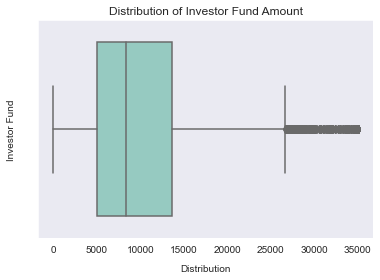

In [1602]:
plt.title("Distribution of Investor Fund Amount")
sns.boxplot(x = 'funded_amnt_inv', data = loan_data, palette="Set3")
plt.ylabel('Investor Fund', labelpad = 15)
plt.xlabel('Distribution', labelpad = 10)

**Observation on Investor Fund Amount(funded_amnt_inv)**
- There are some values far away from mean but cannot be considered as extreme values.
- The distribution is very much continous ( not disconnected)
- Outlier treatment not required for this column. 


###### Handling date column

In [1603]:
#converting issue date to date time and extract month and year into new columns
loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data['issue_d_month'] = loan_data['issue_d'].dt.month
loan_data['issue_d_year'] = loan_data['issue_d'].dt.year


###### Rename columns to make it more readable

In [1604]:
# make the funded_amnt_inv
loan_data = loan_data.rename(columns = {'funded_amnt_inv' : 'investor_funds'})

## Analysis

In [1605]:
def display_crosstab_vs_loanStatus(col,display_stat=True):
    crosstab = pd.crosstab(loan_data[col], loan_data['loan_status'],margins=True)
    crosstab['Percentage_Fully Paid'] = round(((100*crosstab["Fully Paid"])/crosstab['All']),3)
    crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    if display_stat is True:
        display(crosstab)
        display(crossTab[['Percentage_Fully Paid','Percentage_Charged Off']].describe())
    return crosstab

In [1606]:
# Numerical variables high level analysis
loan_data.describe()

id  investor_funds   int_rate  installment  annual_inc  \
count 36642.0000   36642.0000      36642.0000 36642.0000   36642.0000    
mean  676111.7470  9892.9992       11.8879    311.8636     60829.8311    
std   209275.5684  6730.0544       3.6672     199.2150     27717.8315    
min   54734.0000   0.0000          5.4200     15.6900      4000.0000     
25%   512172.0000  4975.0000       8.9400     163.0800     40000.0000    
50%   655664.5000  8375.0000       11.7100    270.4100     56000.0000    
75%   828137.0000  13618.4095      14.2700    408.4800     77704.0500    
max   1077501.0000 35000.0000      24.4000    1305.1900    140000.0000   

             dti  pub_rec_bankruptcies  emp_length_num  issue_d_month  \
count 36642.0000 36642.0000            36642.0000      36642.0000       
mean  13.4473    0.0439                5.0417          7.1086           
std   6.6616     0.2056                3.5959          3.4121           
min   0.0000     0.0000                0.0000          1.0000           
25%   8.3500     0.0000                2.0000          4.0000           
50%   13.5800    0.0000                4.0000          7.0000           
75%   18.7175    0.0000                9.0000          10.0000          
max   29.9900    2.0000                10.0000         12.0000          

       issue_d_year  
count 36642.0000     
mean  2010.3083      
std   0.8813         
min   2007.0000      
25%   2010.0000      
50%   2011.0000      
75%   2011.0000      
max   2011.0000

##### Univariate Analysis

Study the distributions of various loan attributes.

###### Quantitative Variables
- **funded_amnt_inv** - The total amount committed by investors for that loan at that point in time.
- **int_rate** - Interest Rate on the loan
- **annual_inc** - The self-reported annual income provided by the borrower during registration.
- **dti** - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

Analysis for **funded_amnt_inv** - The total amount committed by investors for that loan at that point in time.

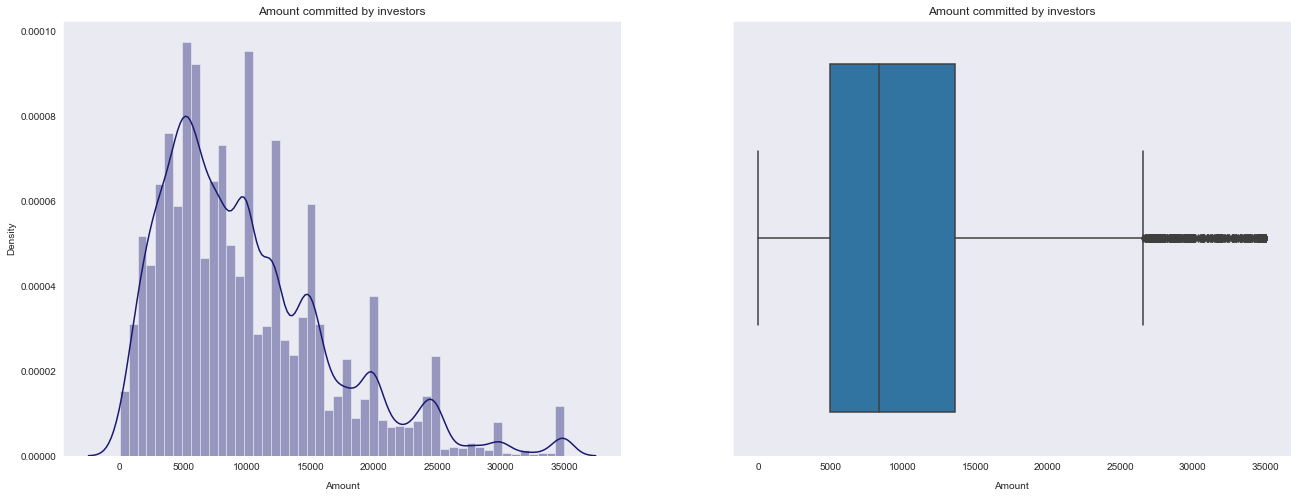

In [1607]:
#Distribution of the investor_funds (i.e: funded_amnt_inv) - The total amount committed by investors for that loan at that point in time.


plt.figure(figsize = (22,8))
plt.subplot(1,2,1)
sns.distplot(loan_data['investor_funds'], color = 'midnightblue')
plt.title("Amount committed by investors")
plt.xlabel('Amount', labelpad = 10)

plt.subplot(1,2,2)
sns.boxplot(data =loan_data, x='investor_funds',orient='v')
plt.title("Amount committed by investors")
plt.xlabel('Amount', labelpad = 10)
plt.show()


In [1608]:
loan_data['investor_funds'].describe(percentiles=[0.15,0.25,0.5,0.75,0.85])


count   36642.0000
mean    9892.9992 
std     6730.0544 
min     0.0000    
15%     3500.0000 
25%     4975.0000 
50%     8375.0000 
75%     13618.4095
85%     16400.0000
max     35000.0000
Name: investor_funds, dtype: float64

Obervations for '**Amount committed by investors**(Loan Amount)'
- Majority of loan amounts between 5000 and 20000

#### int_rate - Interest Rate on the loan

In [1609]:
loan_data['int_rate'].describe(percentiles=[0.15,0.2,0.25,0.5,0.7,0.75,0.8,0.85])


count   36642.0000
mean    11.8879   
std     3.6672    
min     5.4200    
15%     7.5100    
20%     7.9000    
25%     8.9400    
50%     11.7100   
70%     13.7200   
75%     14.2700   
80%     15.2000   
85%     15.9500   
max     24.4000   
Name: int_rate, dtype: float64

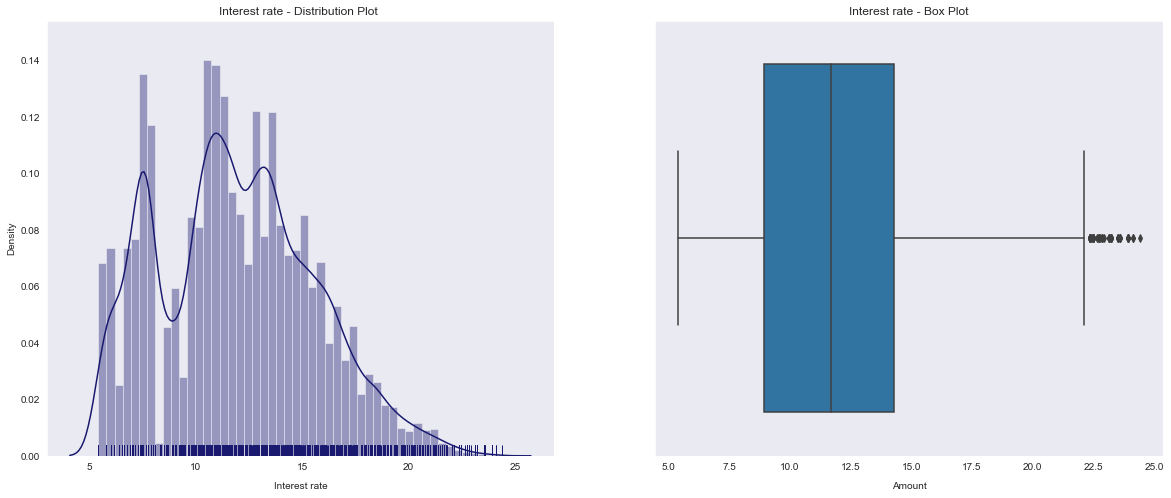

In [1610]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(loan_data['int_rate'], color = 'midnightblue',rug = True)
plt.title("Interest rate - Distribution Plot ")
plt.xlabel('Interest rate', labelpad = 10)

plt.subplot(1,2,2)
sns.boxplot(data =loan_data, x='int_rate',orient='v')
plt.title("Interest rate - Box Plot")
plt.xlabel('Amount', labelpad = 10)
plt.show()


Obervations for '**Interest Rate**'
- Most of the Interest Rates on loans are in range of **9%** - **14.5%**

#### annual_inc - The self-reported annual income provided by the borrower during registration.

In [1611]:
loan_data['annual_inc'].describe(percentiles=[0.15,0.2,0.25,0.5,0.7,0.75,0.8,0.85])

count   36642.0000 
mean    60829.8311 
std     27717.8315 
min     4000.0000  
15%     33000.0000 
20%     36000.0000 
25%     40000.0000 
50%     56000.0000 
70%     72000.0000 
75%     77704.0500 
80%     84000.0000 
85%     91000.0000 
max     140000.0000
Name: annual_inc, dtype: float64

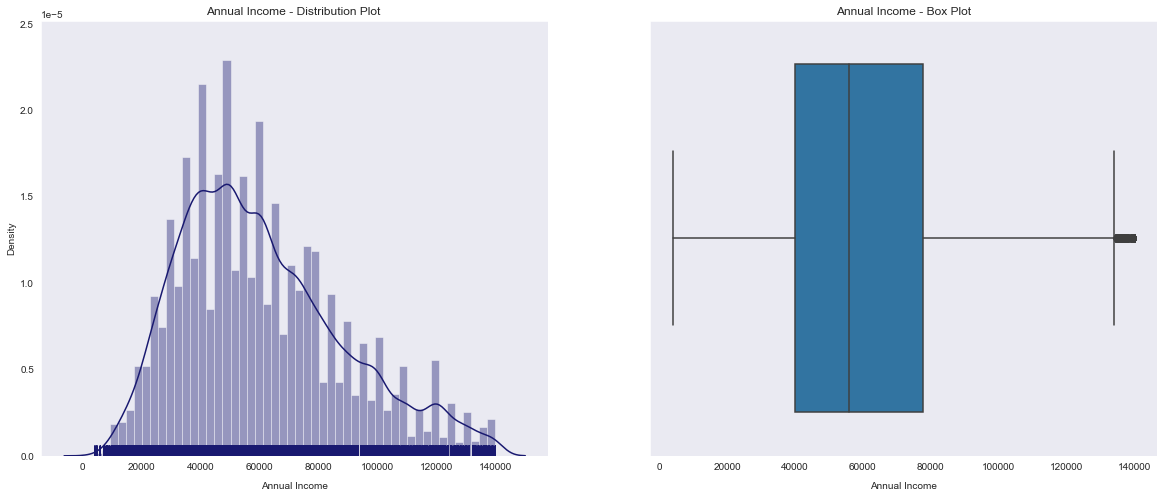

In [1612]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(loan_data['annual_inc'], color = 'midnightblue',rug = True)
plt.title("Annual Income - Distribution Plot ")
plt.xlabel('Annual Income', labelpad = 10)

plt.subplot(1,2,2)
sns.boxplot(data =loan_data, x='annual_inc',orient='v')
plt.title("Annual Income - Box Plot")
plt.xlabel('Annual Income', labelpad = 10)
plt.show()


Obervations for '**Annual Income**'
- Most of the borrower's Annual incomes are in range of 40000- 78000

#### dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [1613]:
loan_data['dti'].describe(percentiles=[0.15,0.2,0.25,0.5,0.7,0.75,0.8,0.85])

count   36642.0000
mean    13.4473   
std     6.6616    
min     0.0000    
15%     5.7215    
20%     7.1400    
25%     8.3500    
50%     13.5800   
70%     17.6270   
75%     18.7175   
80%     19.8600   
85%     21.0500   
max     29.9900   
Name: dti, dtype: float64

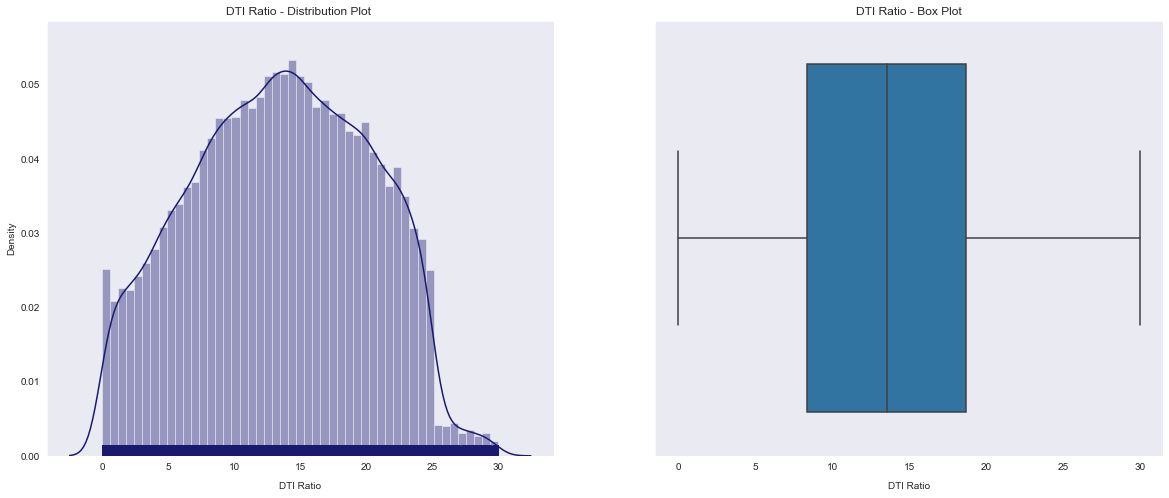

In [1614]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(loan_data['dti'], color = 'midnightblue',rug = True)
plt.title("DTI Ratio - Distribution Plot ")
plt.xlabel('DTI Ratio', labelpad = 10)

plt.subplot(1,2,2)
sns.boxplot(data =loan_data, x='dti',orient='v')
plt.title("DTI Ratio - Box Plot")
plt.xlabel('DTI Ratio', labelpad = 10)
plt.show()


Obervations for '**DTI Ratio**'
- DTI Ratio of the most of the borrowers in the range between 8 to 20.

###### Categorical Variables

**Unordered**
- **loan_status** - Current status of the loan.
- **purpose** - A category provided by the borrower for the loan request.
- **home_ownership** - The home ownership status provided by the borrower during registration. 
- **addr_state** - The state provided by the borrower in the loan application
- **term** - The number of payments on the loan. Values are in months and can be either 36 or 60.
- **verification_status** - Indicates if income was verified by LC, not verified, or if the income source was verified.
- **emp_title** - The job title supplied by the Borrower when applying for the loan.

**Ordered**
- **grade** - LC assigned loan grade
- **sub_grade** - LC assigned loan subgrade
- **emp_length** - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- **issue_d_year** and **issue_d_month** - The month which the loan was funded

#### loan_status - Current status of the loan 

In [1615]:
# loan status percentage
loan_stat_perc = round(loan_data['loan_status'].value_counts() / loan_data.shape[0], 2) *100
loan_stat = loan_data['loan_status'].unique()
loan_stat = list(loan_stat)
loan_stat_perc = list(loan_stat_perc)


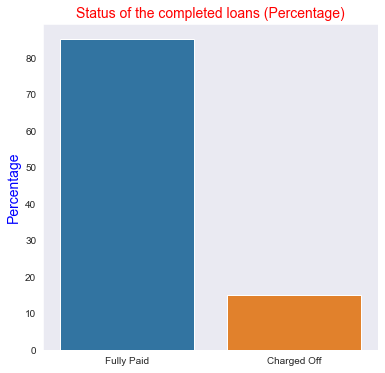

In [1616]:
#Distribution of the investor_funds (i.e: funded_amnt_inv) - The total amount committed by investors for that loan at that point in time.

plt.figure(figsize=(6,6))

ax =sns.barplot(x=loan_stat, y=loan_stat_perc, data=loan_data)
plt.title("Status of the completed loans (Percentage)" ,fontsize=14 , color = "r")
ax.set_ylabel('Percentage',fontsize=14 , color = "b")

plt.show()



Obervations for '**Status of the completed loans**'
- 85% completed loans are **Fully Paid** and 15% of the loans are **defaulted**

##### **purpose** - A category provided by the borrower for the loan request.


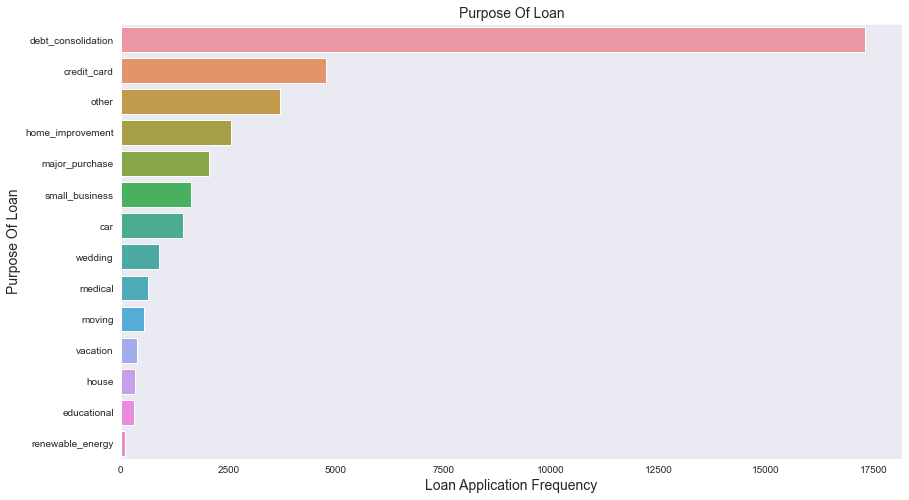

In [1617]:
plt.figure(figsize=(14,8),facecolor='w')
purpose_sorted = loan_data.groupby('purpose').size().sort_values().index[::-1]

ax = sns.countplot(y="purpose",data=loan_data ,order = purpose_sorted)
ax.set_title('Purpose Of Loan',fontsize=14)
ax.set_ylabel('Purpose Of Loan',fontsize=14)
ax.set_xlabel('Loan Application Frequency',fontsize=14)      
plt.show()


Obervations for '**Purpose Of Loan**'
- Most of the loans were taken for the purpose of debt consolidation & paying credit card bill.

##### **home_ownership** - The home ownership status provided by the borrower during registration. 


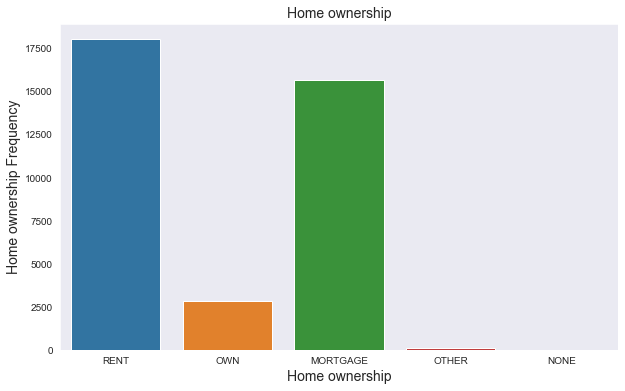

In [1618]:
plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x="home_ownership",data=loan_data )
ax.set_title('Home ownership',fontsize=14)
ax.set_xlabel('Home ownership',fontsize=14)
ax.set_ylabel('Home ownership Frequency',fontsize=14)      
plt.show()


Obervations for '**Home ownership**'
- Most of borrowers are living in rented home or mortgazed their home.

##### **addr_state** - The state provided by the borrower in the loan application


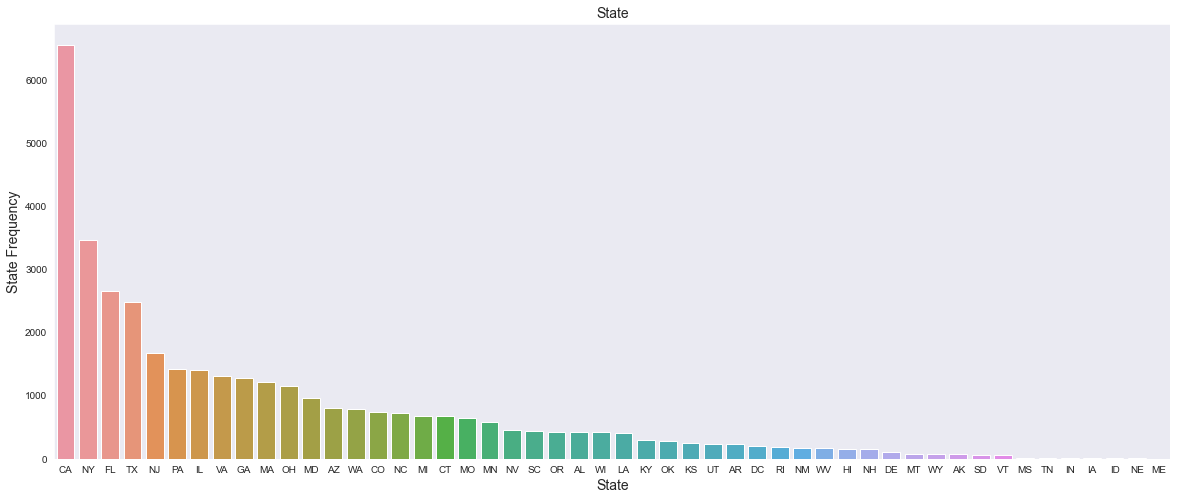

In [1619]:
plt.figure(figsize=(20,8),facecolor='w')
state_sorted = loan_data.groupby('addr_state').size().sort_values().index[::-1]

ax = sns.countplot(x="addr_state",data=loan_data ,order = state_sorted)
ax.set_title('State',fontsize=14)
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('State Frequency',fontsize=14)      
plt.show()


Obervations for '**Borrower State**'
- Most of the loans are from CA,NY,FL and TX.

##### **term** - The number of payments on the loan. Values are in months and can be either 36 or 60.

In [1620]:
loan_term_perc = round(loan_data['term'].value_counts() / loan_data.shape[0], 2) *100
loan_term = loan_data['term'].unique()
loan_term = list(loan_term)
loan_term_perc = list(loan_term_perc)

display(loan_term)
display(loan_term_perc)

[' 36 months', ' 60 months']

[76.0, 24.0]

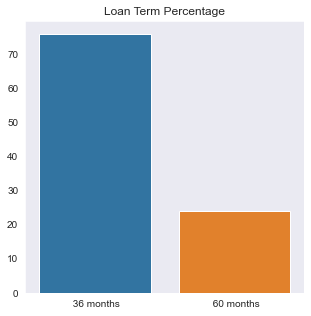

In [1621]:
plt.figure(figsize=(5,5))
sns.barplot(x=loan_term, y=loan_term_perc, data=loan_data)
plt.title("Loan Term Percentage")
plt.show()


Obervations for '**term**'
- 76% percent of the loans are 36 months and remaining loans are of 60 months term.

##### **verification_status** - Indicates if income was verified by LC, not verified, or if the income source was verified.

In [1622]:
loan_verification_perc = round(loan_data['verification_status'].value_counts() / loan_data.shape[0], 2) *100
loan_verification = loan_data['verification_status'].unique()
loan_verification = list(loan_verification)
loan_verification_perc = list(loan_verification_perc)

print(loan_verification)
print(loan_verification_perc)

['Verified', 'Source Verified', 'Not Verified']
[44.0, 31.0, 25.0]


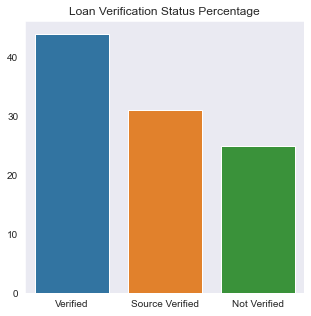

In [1623]:
plt.figure(figsize=(5,5))
sns.barplot(x=loan_verification, y=loan_verification_perc, data=loan_data)
plt.title("Loan Verification Status Percentage")
plt.show()


Obervations for '**Loan Verification Status**'
- Around 75% percent of the loans are are either **Verified** or **Source Verified**.

##### **emp_length** - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

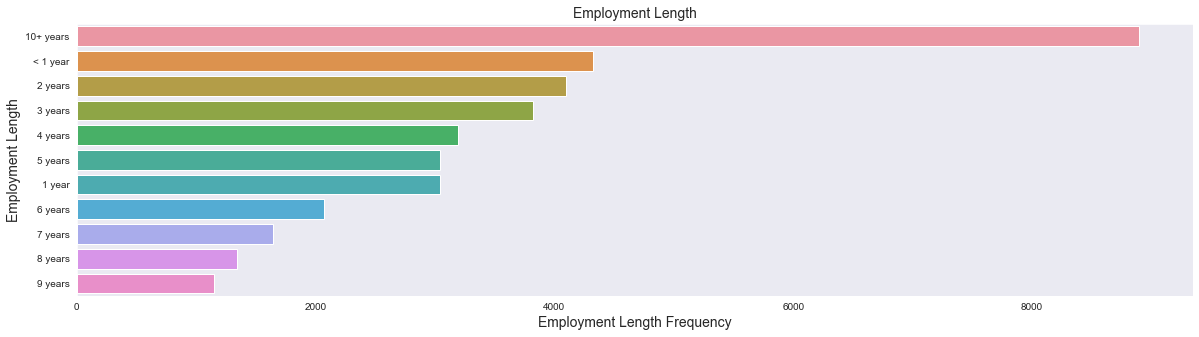

In [1624]:
plt.figure(figsize=(20,5),facecolor='w')

emp_len_sorted = loan_data.groupby('emp_length').size().sort_values().index[::-1]

ax = sns.countplot(y="emp_length",data=loan_data , order = emp_len_sorted  )
ax.set_title('Employment Length',fontsize=14)
ax.set_ylabel('Employment Length',fontsize=14)
ax.set_xlabel('Employment Length Frequency',fontsize=14)      


plt.show()


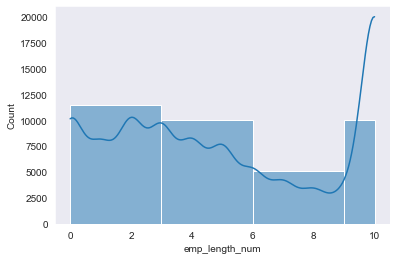

In [1625]:
bins = [0,3, 6, 9, 10]
ax = sns.histplot(data=loan_data, x="emp_length_num", kde=True, bins= bins)

Obervations for '**emp_length**'
- People with 10 year+ Empolyment has most loan applications.
- Interestingly 2nd hightest number of loan applications are from people with less then 1 year employment length.
- People with 7,8 and 9 years Employment length relatively has low loan applications compare to others groups.
- Sum of loan application of with less then 3 Years Employment(0,1 and 2) is higher then the other groups.

##### grade vs sub_grade
- **grade** - LC assigned loan grade 
- **sub_grade** -LC assigned loan subgrade

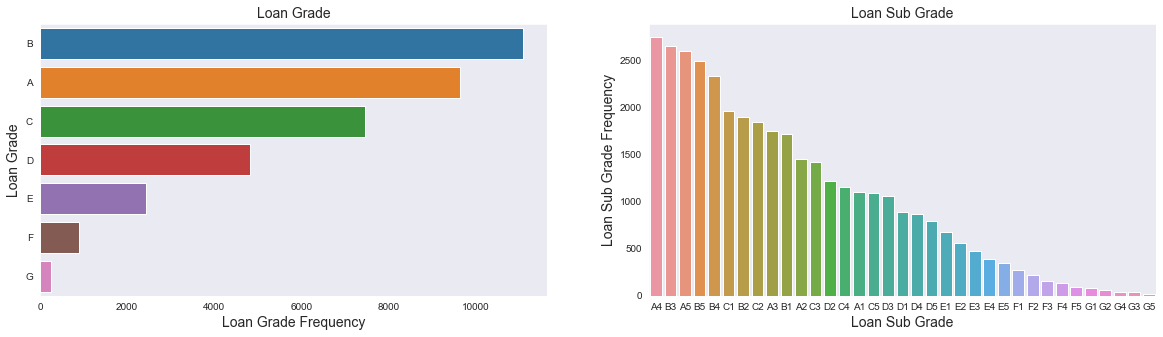

In [1626]:
plt.figure(figsize=(20,5),facecolor='w')
plt.subplot(1, 2, 1)

grade_sorted = loan_data.groupby('grade').size().sort_values().index[::-1]

ax = sns.countplot(y="grade",data=loan_data , order = grade_sorted  )
ax.set_title('Loan Grade',fontsize=14)
ax.set_ylabel('Loan Grade',fontsize=14)
ax.set_xlabel('Loan Grade Frequency',fontsize=14)      


plt.subplot(1, 2, 2)
sub_grade_sorted = loan_data.groupby('sub_grade').size().sort_values().index[::-1]

ax2 = sns.countplot(x ="sub_grade",data=loan_data , order = sub_grade_sorted )
ax2.set_title('Loan Sub Grade',fontsize=14)
ax2.set_xlabel('Loan Sub Grade',fontsize=14)
ax2.set_ylabel('Loan Sub Grade Frequency',fontsize=14)     

plt.show()


Obervations for '**Grade**'
- Most of loans taken are of the grade B and A.
- Most of the loan sub grades are of A4, B3, A5, B5 and B4.

##### **issue_d_year** and **issue_d_month** 
- The month which the loan was funded

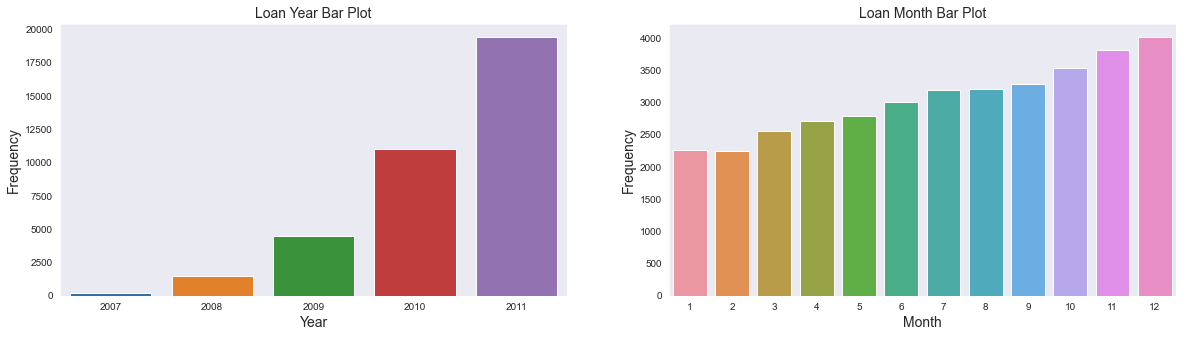

In [1627]:
plt.figure(figsize=(20,5),facecolor='w')
plt.subplot(1, 2, 1)
 
ax = sns.countplot(x="issue_d_year",data=loan_data )
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)      
ax.set_title('Loan Year Bar Plot',fontsize=14)


plt.subplot(1, 2, 2)
ax2 = sns.countplot(x ="issue_d_month",data=loan_data )
ax2.set_title('Loan Month Bar Plot',fontsize=14)
ax2.set_ylabel('Frequency',fontsize=14)
ax2.set_xlabel('Month',fontsize=14)     

plt.show()


Obervations for '**Loan Application Year**' and '**Loan Application Month**'

- There is a clear uptrend in number loan application every year.
- Most of loans are applied during end of the year. ( Most of the loans are taken in the month of December)

## Segmented Analysis on Loan amount against other variables

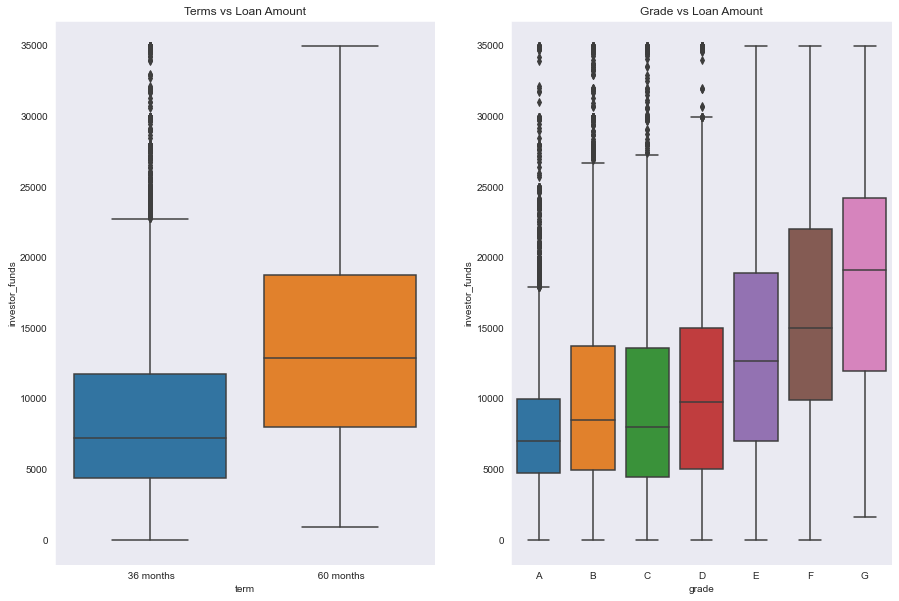

In [1628]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x='term', y=loan_data.investor_funds, data=loan_data)
plt.title('Terms vs Loan Amount')

plt.subplot(1,2,2)
plt.title('Grade vs Loan Amount')
#Sort Grades in Alphabatical order
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.investor_funds, order = grade_ord, data=loan_data)
plt.show()



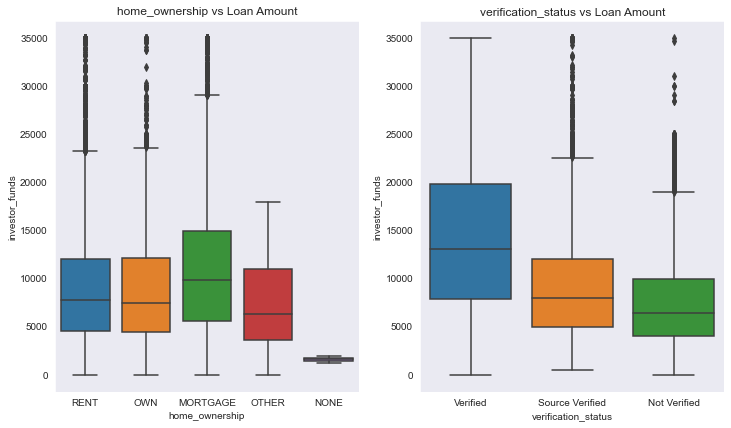

In [1629]:
plt.figure(figsize=(12,15))
plt.subplot(2,2,1)
sns.boxplot(x='home_ownership', y=loan_data.investor_funds, data=loan_data)
plt.title('home_ownership vs Loan Amount')

plt.subplot(2,2,2)
plt.title('verification_status vs Loan Amount')
verification_status_ordered = loan_data.verification_status.unique().sort()
sns.boxplot(x='verification_status', y=loan_data.investor_funds, order = verification_status_ordered, data=loan_data)
plt.show()


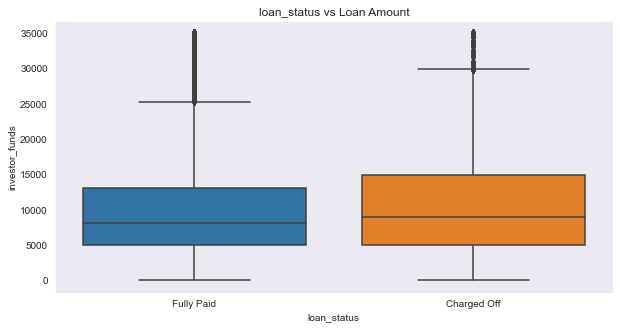

In [1630]:
plt.figure(figsize=(10,5))

#plt.subplot(3,1,1)
sns.boxplot(x='loan_status', y=loan_data.investor_funds, data=loan_data)
plt.title('loan_status vs Loan Amount')

plt.show()




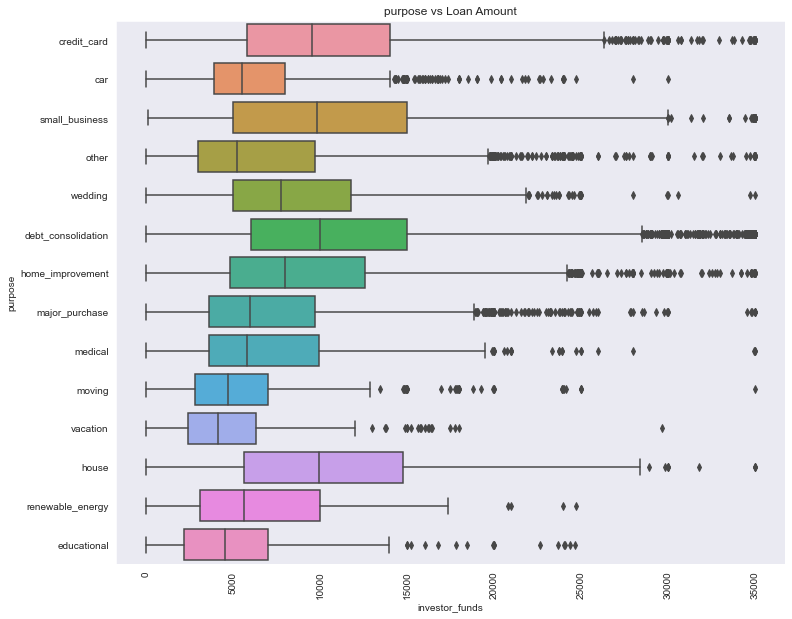

In [1631]:
plt.figure(figsize=(12,10))

# plt.subplot(1,1,1)
sns.boxplot(y='purpose', x=loan_data.investor_funds, data=loan_data)
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

plt.show()


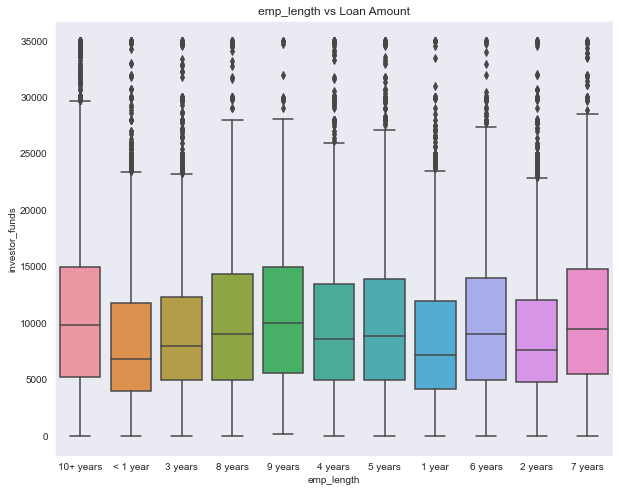

In [1632]:
plt.figure(figsize=(10,8))

sns.boxplot(x='emp_length', y=loan_data.investor_funds, data=loan_data)
plt.title('emp_length vs Loan Amount')
plt.show()


#### Observation on Loan Amount (funded_amnt_inv) vs other variables


- Charged Off loans have higher loan amounts compare to Fully Paid loans.
- Higher loan amount have high terms/durations.
- Loan Grades 'G' and 'H' have the higher loan amounts. Grades are decreasing as the loan amount is increases.
- Small bussiness has the more loan amount followed by debt consolidation. Educational loans have the lower loan amounts.
- Borrowers of 10+ years Employment lenght take more amount of loan while low loan amount values taken by borrowers with less than 1 years of Employment length.
- Most of the borrowers with loan amount more than **8000** are verified.
- Borrowers who are with MORTAGE has higher median loan amount compare to other home ownership borrowers.




 



### Intest Rate vs (Term, Grade)


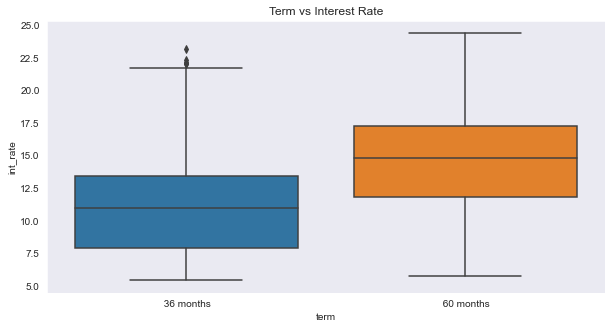

In [1633]:
plt.figure(figsize=(10,5))
sns.boxplot(x='term', y=loan_data.int_rate, data=loan_data)
plt.title('Term vs Interest Rate')
plt.show()

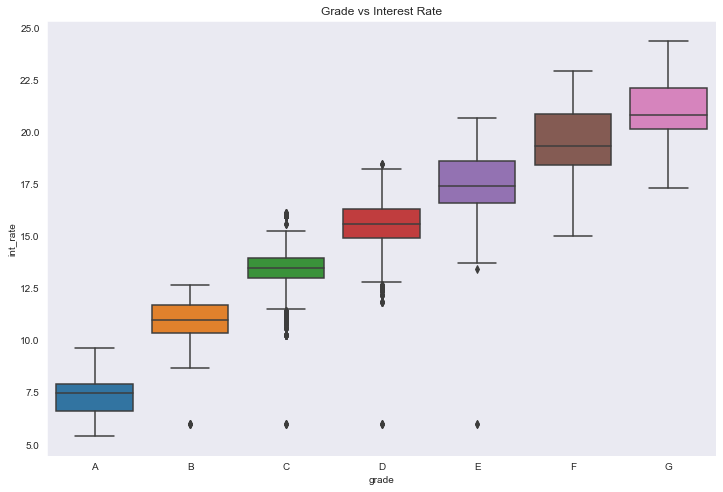

In [1634]:
plt.figure(figsize=(12,8))

plt.title('Grade vs Interest Rate')
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.int_rate, order = grade_ord, data=loan_data)
plt.show()

### Observation on Interest rate vs terms and Interest Rate vs Grade
- Higher tenure loans has higher interest rates.
- Lower loan grades (towards G) has higher interest rates.

## Bivariate Analysis

Here we will study the impact of other variables in the loan_status.

##  Purpose of Loans vs Loan Status

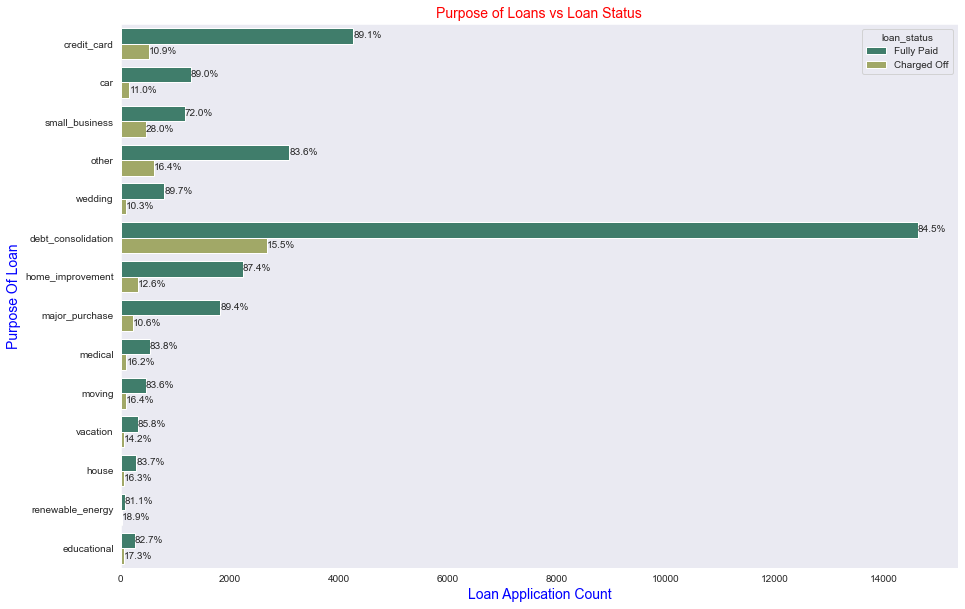

In [1635]:
plt.figure(figsize=(15,10))
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan_data,hue='loan_status',palette='gist_earth')
ax.set_title('Purpose of Loans vs Loan Status',fontsize=14,color='r')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'b')      


hue_type = loan_data['loan_status'].dtype.type

groups = loan_data['purpose'].unique()
proportions = loan_data.groupby('purpose')['loan_status'].value_counts(normalize=True)


for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
    ax.bar_label(c, labels)


plt.show()

In [1636]:
crossTab = display_crosstab_vs_loanStatus('purpose')

loan_status         Charged Off  Fully Paid    All  Percentage_Fully Paid  \
purpose                                                                     
car                 159          1289        1448  89.0190                  
credit_card         519          4263        4782  89.1470                  
debt_consolidation  2675         14626       17301 84.5380                  
educational         54           258         312   82.6920                  
home_improvement    322          2233        2555  87.3970                  
house               55           283         338   83.7280                  
major_purchase      217          1828        2045  89.3890                  
medical             104          536         640   83.7500                  
moving              90           460         550   83.6360                  
other               605          3091        3696  83.6310                  
renewable_energy    18           77          95    81.0530                  
small_business      454          1169        1623  72.0270                  
vacation            52           313         365   85.7530                  
wedding             92           800         892   89.6860                  

loan_status         Percentage_Charged Off  
purpose                                     
car                10.9810                  
credit_card        10.8530                  
debt_consolidation 15.4620                  
educational        17.3080                  
home_improvement   12.6030                  
house              16.2720                  
major_purchase     10.6110                  
medical            16.2500                  
moving             16.3640                  
other              16.3690                  
renewable_energy   18.9470                  
small_business     27.9730                  
vacation           14.2470                  
wedding            10.3140

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       12.0000                12.0000                
mean        85.3813                14.6187                
std         1.3494                 1.3494                 
min         83.6780                12.5280                
25%         84.3738                13.6077                
50%         85.2680                14.7320                
75%         86.3923                15.6262                
max         87.4720                16.3220

Obervations for impact of '**Purpose of Loans**' on '**Loan Status**'

- 28% of the small business loans are defaulted which is the highest default rate among all loan purpose categories.
- wedding loans the most successfully Full Paid loan type with 10.3% followed by Major Purchase and Credit Card loans with 10.6% and 10.9% default rates.
- Mean default rate is around 15.3% which is very close to the default ratio of the Debt Consolidations loans which is the major loan purpose category.

##  Home Ownership vs Loan Status

In [1637]:
crossTab = display_crosstab_vs_loanStatus('home_ownership')

loan_status     Charged Off  Fully Paid    All  Percentage_Fully Paid  \
home_ownership                                                          
MORTGAGE        2192         13474       15666 86.0080                  
NONE            0            3           3     100.0000                 
OTHER           17           75          92    81.5220                  
OWN             434          2418        2852  84.7830                  
RENT            2773         15256       18029 84.6190                  

loan_status     Percentage_Charged Off  
home_ownership                          
MORTGAGE       13.9920                  
NONE           0.0000                   
OTHER          18.4780                  
OWN            15.2170                  
RENT           15.3810

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       14.0000                14.0000                
mean        84.6747                15.3253                
std         4.6055                 4.6055                 
min         72.0270                10.3140                
25%         83.6322                11.3865                
50%         84.1440                15.8560                
75%         88.6135                16.3678                
max         89.6860                27.9730

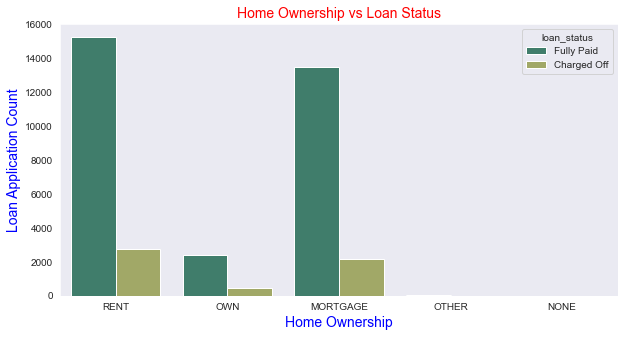

In [1638]:
plt.figure(figsize=(10,5))
sns.set_style("dark")
ax = sns.countplot(x="home_ownership",data=loan_data,hue='loan_status',palette='gist_earth')
ax.set_title('Home Ownership vs Loan Status',fontsize=14,color='r')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      

plt.show()

Obervations for impact of '**Home Ownership**' on '**Loan Status**'

- Number of home ownership types **'Other'** and '**None'** are negligible compare to other 3 types , hence ignoring these 2 types.
- People who live on **rent** houses has highest default rate which is around **15.4%**.

##  Address State vs Loan Status

In [1639]:
crossTab = display_crosstab_vs_loanStatus('addr_state')

loan_status  Charged Off  Fully Paid   All  Percentage_Fully Paid  \
addr_state                                                          
AK           13           58          71   81.6900                  
AL           52           371         423  87.7070                  
AR           26           203         229  88.6460                  
AZ           117          693         810  85.5560                  
CA           1073         5487        6560 83.6430                  
CO           96           645         741  87.0450                  
CT           90           581         671  86.5870                  
DC           13           182         195  93.3330                  
DE           12           97          109  88.9910                  
FL           485          2167        2652 81.7120                  
GA           208          1078        1286 83.8260                  
HI           28           132         160  82.5000                  
IA           0            5           5    100.0000                 
ID           1            4           5    80.0000                  
IL           192          1213        1405 86.3350                  
IN           0            9           9    100.0000                 
KS           30           215         245  87.7550                  
KY           45           259         304  85.1970                  
LA           51           350         401  87.2820                  
MA           150          1059        1209 87.5930                  
MD           156          810         966  83.8510                  
ME           0            3           3    100.0000                 
MI           100          582         682  85.3370                  
MN           81           506         587  86.2010                  
MO           111          536         647  82.8440                  
MS           2            17          19   89.4740                  
MT           11           72          83   86.7470                  
NC           113          606         719  84.2840                  
NE           3            2           5    40.0000                  
NH           25           132         157  84.0760                  
NJ           269          1402        1671 83.9020                  
NM           30           147         177  83.0510                  
NV           103          354         457  77.4620                  
NY           468          2995        3463 86.4860                  
OH           151          996         1147 86.8350                  
OK           40           241         281  85.7650                  
OR           70           358         428  83.6450                  
PA           177          1245        1422 87.5530                  
RI           24           162         186  87.0970                  
SC           64           377         441  85.4880                  
SD           12           50          62   80.6450                  
TN           2            15          17   88.2350                  
TX           295          2181        2476 88.0860                  
UT           38           204         242  84.2980                  
VA           174          1134        1308 86.6970                  
VT           6            47          53   88.6790                  
WA           124          660         784  84.1840                  
WI           60           361         421  85.7480                  
WV           21           148         169  87.5740                  
WY           4            75          79   94.9370                  

loan_status  Percentage_Charged Off  
addr_state                           
AK          18.3100                  
AL          12.2930                  
AR          11.3540                  
AZ          14.4440                  
CA          16.3570                  
CO          12.9550                  
CT          13.4130                  
DC          6.6670                   
DE          11.0090            

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       5.0000                 5.0000                 
mean        87.3864                12.6136                
std         7.2428                 7.2428                 
min         81.5220                0.0000                 
25%         84.6190                13.9920                
50%         84.7830                15.2170                
75%         86.0080                15.3810                
max         100.0000               18.4780

### Filter states with less than 100 loans ( to avoid impact on percentage analysis from low frequency loan application states) and sort by charge off percentage

In [1640]:
crossTab[crossTab['All']>100].sort_values(by='Percentage_Charged Off',ascending=False)

loan_status  Charged Off  Fully Paid   All  Percentage_Fully Paid  \
addr_state                                                          
NV           103          354         457  77.4620                  
FL           485          2167        2652 81.7120                  
HI           28           132         160  82.5000                  
MO           111          536         647  82.8440                  
NM           30           147         177  83.0510                  
CA           1073         5487        6560 83.6430                  
OR           70           358         428  83.6450                  
GA           208          1078        1286 83.8260                  
MD           156          810         966  83.8510                  
NJ           269          1402        1671 83.9020                  
NH           25           132         157  84.0760                  
WA           124          660         784  84.1840                  
NC           113          606         719  84.2840                  
UT           38           204         242  84.2980                  
KY           45           259         304  85.1970                  
MI           100          582         682  85.3370                  
SC           64           377         441  85.4880                  
AZ           117          693         810  85.5560                  
WI           60           361         421  85.7480                  
OK           40           241         281  85.7650                  
MN           81           506         587  86.2010                  
IL           192          1213        1405 86.3350                  
NY           468          2995        3463 86.4860                  
CT           90           581         671  86.5870                  
VA           174          1134        1308 86.6970                  
OH           151          996         1147 86.8350                  
CO           96           645         741  87.0450                  
RI           24           162         186  87.0970                  
LA           51           350         401  87.2820                  
PA           177          1245        1422 87.5530                  
WV           21           148         169  87.5740                  
MA           150          1059        1209 87.5930                  
AL           52           371         423  87.7070                  
KS           30           215         245  87.7550                  
TX           295          2181        2476 88.0860                  
AR           26           203         229  88.6460                  
DE           12           97          109  88.9910                  
DC           13           182         195  93.3330                  

loan_status  Percentage_Charged Off  
addr_state                           
NV          22.5380                  
FL          18.2880                  
HI          17.5000                  
MO          17.1560                  
NM          16.9490                  
CA          16.3570                  
OR          16.3550                  
GA          16.1740                  
MD          16.1490                  
NJ          16.0980                  
NH          15.9240                  
WA          15.8160                  
NC          15.7160                  
UT          15.7020                  
KY          14.8030                  
MI          14.6630                  
SC          14.5120                  
AZ          14.4440                  
WI          14.2520                  
OK          14.2350                  
MN          13.7990                  
IL          13.6650                  
NY          13.5140                  
CT          13.4130                  
VA          13.3030                  
OH          13.1650                  
CO          12.9550                  
RI          12.9030                  
LA          12.7180                  
PA          12.4470                  
WV          12.4260    

Obervations for impact of '**Address State**' on '**Loan Status**' (Analysis applied for the states with more than 100 loans)

- **NV** has the highest percentage of Charged Off (**22.5%**)
- **DC** has the lowest percentage of Charged Off (**6.67%**)

##  Term vs Loan Status

In [1641]:
crossTab = display_crosstab_vs_loanStatus('term')

loan_status  Charged Off  Fully Paid    All  Percentage_Fully Paid  \
term                                                                 
 36 months   3113         24601       27714 88.7670                  
 60 months   2303         6625        8928  74.2050                  

loan_status  Percentage_Charged Off  
term                                 
 36 months  11.2330                  
 60 months  25.7950

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       50.0000                50.0000                
mean        85.6916                14.3084                
std         8.0077                 8.0077                 
min         40.0000                0.0000                 
25%         83.8637                12.3215                
50%         86.2680                13.7320                
75%         87.6785                16.1363                
max         100.0000               60.0000

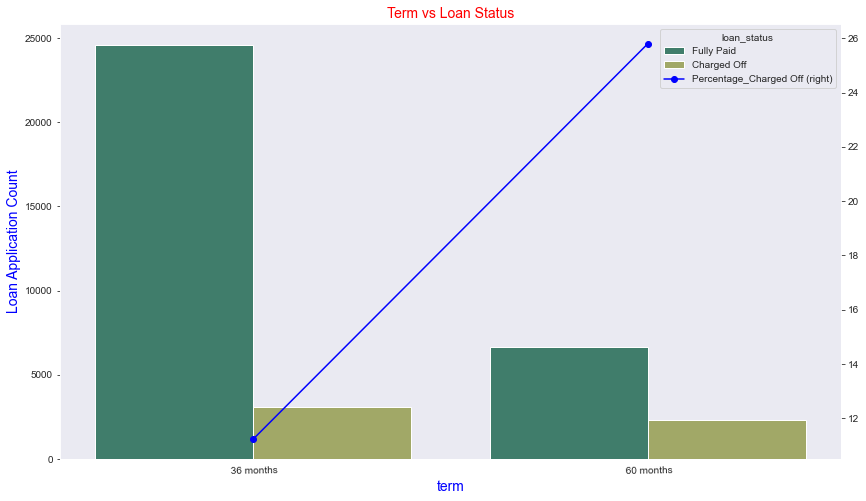

In [1642]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(x="term",data=loan_data,hue='loan_status',palette='gist_earth')
ax.set_title('Term vs Loan Status',fontsize=14,color='r')
ax.set_xlabel('Term',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')   
linePlot = crossTab[['Percentage_Charged Off']]  
ax2 = linePlot.plot(figsize=(14,8),ax = ax,rot=1,secondary_y=True, marker='o',color = 'b')

plt.show()

Obervations for impact of '**Term**' on '**Loan Status**'

- **60 Months** loan term has higher charge Off percentage (**25.8%**) compare to **36 Months** loan term (**11.2%**).

##  Verification Status vs  Loan Status

In [1643]:
crossTab = display_crosstab_vs_loanStatus('verification_status')

loan_status          Charged Off  Fully Paid    All  Percentage_Fully Paid  \
verification_status                                                          
Not Verified         2095         14183       16278 87.1300                  
Source Verified      1373         7777        9150  84.9950                  
Verified             1948         9266        11214 82.6290                  

loan_status          Percentage_Charged Off  
verification_status                          
Not Verified        12.8700                  
Source Verified     15.0050                  
Verified            17.3710

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       2.0000                 2.0000                 
mean        81.4860                18.5140                
std         10.2969                10.2969                
min         74.2050                11.2330                
25%         77.8455                14.8735                
50%         81.4860                18.5140                
75%         85.1265                22.1545                
max         88.7670                25.7950

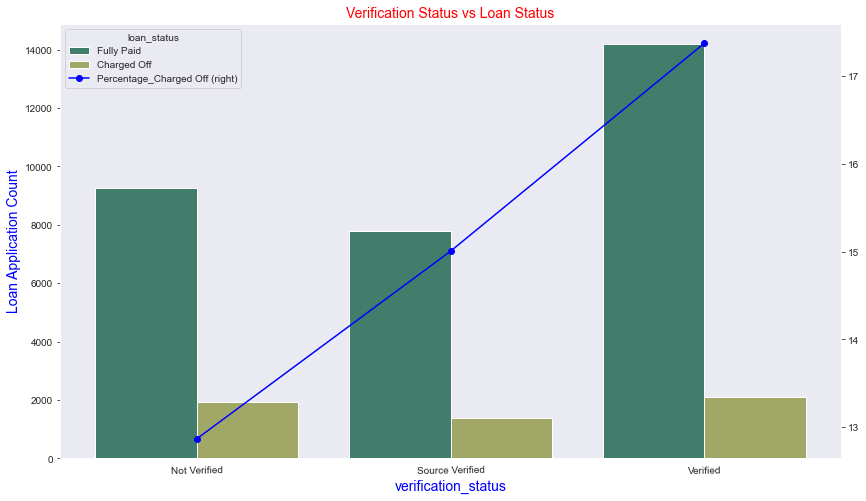

In [1644]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(x="verification_status",data=loan_data,hue='loan_status',palette='gist_earth')
ax.set_title('Verification Status vs Loan Status',fontsize=14,color='r')
ax.set_xlabel('Verification Status',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')   
linePlot = crossTab[['Percentage_Charged Off']]  
ax2 = linePlot.plot(figsize=(14,8),ax = ax,rot=1,secondary_y=True, marker='o',color = 'b')

plt.show()

Obervations for impact of '**Verification Status**' on '**Loan Status**'

- Loans with Verification Status **Verified** has higher charge Off percentage (**17.37%**)

##  Grade and Sub-Grade vs Loan Status

In [1645]:
crossTab = display_crosstab_vs_loanStatus('grade')

loan_status  Charged Off  Fully Paid    All  Percentage_Fully Paid  \
grade                                                                
A            593          9050        9643  93.8500                  
B            1376         9720        11096 87.5990                  
C            1324         6153        7477  82.2920                  
D            1080         3754        4834  77.6580                  
E            659          1786        2445  73.0470                  
F            289          597         886   67.3810                  
G            95           166         261   63.6020                  

loan_status  Percentage_Charged Off  
grade                                
A           6.1500                   
B           12.4010                  
C           17.7080                  
D           22.3420                  
E           26.9530                  
F           32.6190                  
G           36.3980

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       3.0000                 3.0000                 
mean        84.9180                15.0820                
std         2.2515                 2.2515                 
min         82.6290                12.8700                
25%         83.8120                13.9375                
50%         84.9950                15.0050                
75%         86.0625                16.1880                
max         87.1300                17.3710

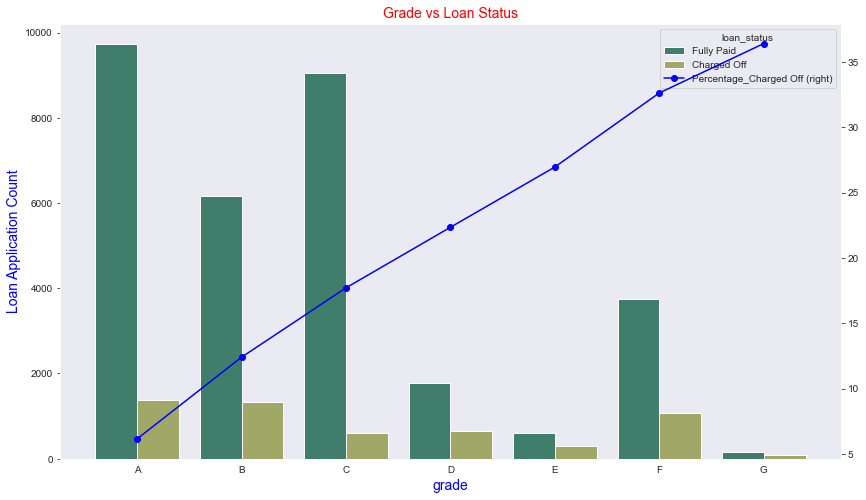

In [1646]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(x="grade",data=loan_data,hue='loan_status',palette='gist_earth')
ax.set_title('Grade vs Loan Status',fontsize=14,color='r')
ax.set_xlabel('Grade',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')   
linePlot = crossTab[['Percentage_Charged Off']]  
ax2 = linePlot.plot(figsize=(14,8),ax = ax,rot=1,secondary_y=True, marker='o',color = 'b')

plt.show()

loan_status  Charged Off  Fully Paid   All  Percentage_Fully Paid  \
sub_grade                                                           
A1           30           1067        1097 97.2650                  
A2           74           1377        1451 94.9000                  
A3           103          1645        1748 94.1080                  
A4           173          2575        2748 93.7050                  
A5           213          2386        2599 91.8050                  
B1           166          1552        1718 90.3380                  
B2           217          1682        1899 88.5730                  
B3           326          2328        2654 87.7170                  
B4           319          2014        2333 86.3270                  
B5           348          2144        2492 86.0350                  
C1           327          1634        1961 83.3250                  
C2           316          1531        1847 82.8910                  
C3           267          1151        1418 81.1710                  
C4           209          946         1155 81.9050                  
C5           205          891         1096 81.2960                  
D1           161          727         888  81.8690                  
D2           264          959         1223 78.4140                  
D3           246          817         1063 76.8580                  
D4           209          662         871  76.0050                  
D5           200          589         789  74.6510                  
E1           184          488         672  72.6190                  
E2           150          415         565  73.4510                  
E3           109          362         471  76.8580                  
E4           117          275         392  70.1530                  
E5           99           246         345  71.3040                  
F1           80           196         276  71.0140                  
F2           67           150         217  69.1240                  
F3           46           110         156  70.5130                  
F4           46           93          139  66.9060                  
F5           50           48          98   48.9800                  
G1           30           58          88   65.9090                  
G2           26           40          66   60.6060                  
G3           19           21          40   52.5000                  
G4           11           34          45   75.5560                  
G5           9            13          22   59.0910                  

loan_status  Percentage_Charged Off  
sub_grade                            
A1          2.7350                   
A2          5.1000                   
A3          5.8920                   
A4          6.2950                   
A5          8.1950                   
B1          9.6620                   
B2          11.4270                  
B3          12.2830                  
B4          13.6730                  
B5          13.9650                  
C1          16.6750                  
C2          17.1090                  
C3          18.8290                  
C4          18.0950                  
C5          18.7040                  
D1          18.1310                  
D2          21.5860                  
D3          23.1420                  
D4          23.9950                  
D5          25.3490                  
E1          27.3810                  
E2          26.5490                  
E3          23.1420                  
E4          29.8470                  
E5          28.6960                  
F1          28.9860                  
F2          30.8760                  
F3          29.4870                  
F4          33.0940                  
F5          51.0200                  
G1          34.0910                  
G2          39.3940                  
G3          47.5000                  
G4          24.4440                  
G5          40.9090

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       7.0000                 7.0000                 
mean        77.9184                22.0816                
std         10.8509                10.8509                
min         63.6020                6.1500                 
25%         70.2140                15.0545                
50%         77.6580                22.3420                
75%         84.9455                29.7860                
max         93.8500                36.3980

<Figure size 1008x576 with 0 Axes>

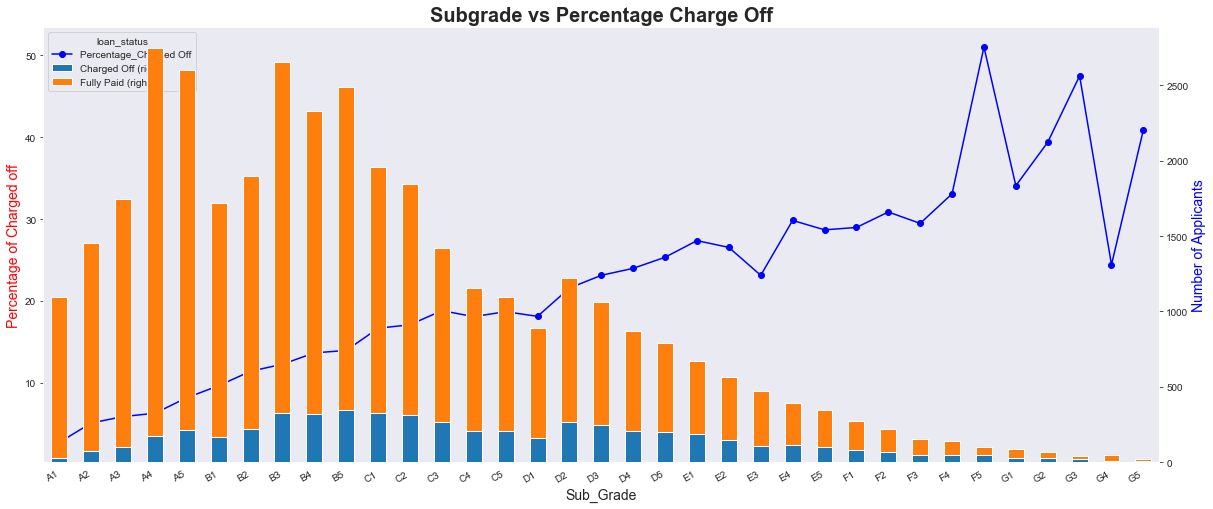

In [1647]:
plt.figure(figsize=(14,8))
sns.set_style("dark")


plotCrosstab = display_crosstab_vs_loanStatus('sub_grade', True)

linePlot = plotCrosstab[['Percentage_Charged Off']]      
barPlot =  plotCrosstab.iloc[:,0:2]
ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True)
ax.set_title('Subgrade vs Percentage Charge Off',fontsize=20,weight="bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_xlabel(loan_data['sub_grade'].name.title(),fontsize=14)
ax.set_ylabel('Percentage of Charged off',color = 'r',fontsize=14)
ax2.set_ylabel('Number of Applicants',color = 'b',fontsize=14)
ax2.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

Obervations for impact of '**Grade**' and **'Sub Grade'** on '**Loan Status**'

- Loans of Grade **A** and **B** has low Charged Off rates and these seems to be the safe grades while **F** and **G** has higher Charge Off rates. Hence loan grades **A** are **B** are much safer to the investors while **F** and **G** are less safe.
- While the Sub grade **A1** has the lowest Charge Off percentage (**2.7%**) **F5** has the highest charge off status (**51%**)

##  Employment Length vs Loan Status

In [1648]:
crossTab = display_crosstab_vs_loanStatus('emp_length')

loan_status  Charged Off  Fully Paid   All  Percentage_Fully Paid  \
emp_length                                                          
1 year       449          2594        3043 85.2450                  
10+ years    1494         7404        8898 83.2100                  
2 years      547          3554        4101 86.6620                  
3 years      536          3287        3823 85.9800                  
4 years      443          2754        3197 86.1430                  
5 years      441          2603        3044 85.5120                  
6 years      294          1779        2073 85.8180                  
7 years      252          1391        1643 84.6620                  
8 years      194          1147        1341 85.5330                  
9 years      149          1003        1152 87.0660                  
< 1 year     617          3710        4327 85.7410                  

loan_status  Percentage_Charged Off  
emp_length                           
1 year      14.7550                  
10+ years   16.7900                  
2 years     13.3380                  
3 years     14.0200                  
4 years     13.8570                  
5 years     14.4880                  
6 years     14.1820                  
7 years     15.3380                  
8 years     14.4670                  
9 years     12.9340                  
< 1 year    14.2590

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       7.0000                 7.0000                 
mean        77.9184                22.0816                
std         10.8509                10.8509                
min         63.6020                6.1500                 
25%         70.2140                15.0545                
50%         77.6580                22.3420                
75%         84.9455                29.7860                
max         93.8500                36.3980

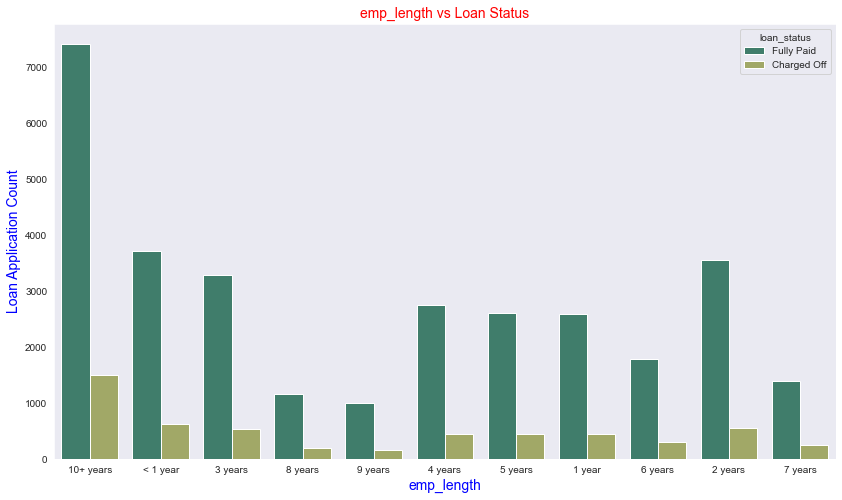

In [1649]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(x="emp_length",data=loan_data,hue='loan_status',palette='gist_earth')
ax.set_title('emp_length vs Loan Status',fontsize=14,color='r')
ax.set_xlabel('emp_length',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')   
linePlot = crossTab[['Percentage_Charged Off']]  

plt.show()

Obervations for impact of **'Employment Length'** on '**Loan Status**'

- Please with **10+ Years** employment length has highest Charge Off percentage(**16.79%**)

##  Year / Month vs Loan Status

In [1650]:
crossTab_year = display_crosstab_vs_loanStatus('issue_d_year')

loan_status   Charged Off  Fully Paid    All  Percentage_Fully Paid  \
issue_d_year                                                          
2007          41           189         230   82.1740                  
2008          237          1252        1489  84.0830                  
2009          567          3908        4475  87.3300                  
2010          1429         9578        11007 87.0170                  
2011          3142         16299       19441 83.8380                  

loan_status   Percentage_Charged Off  
issue_d_year                          
2007         17.8260                  
2008         15.9170                  
2009         12.6700                  
2010         12.9830                  
2011         16.1620

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       11.0000                11.0000                
mean        85.5975                14.4025                
std         1.0254                 1.0254                 
min         83.2100                12.9340                
25%         85.3785                13.9385                
50%         85.7410                14.2590                
75%         86.0615                14.6215                
max         87.0660                16.7900

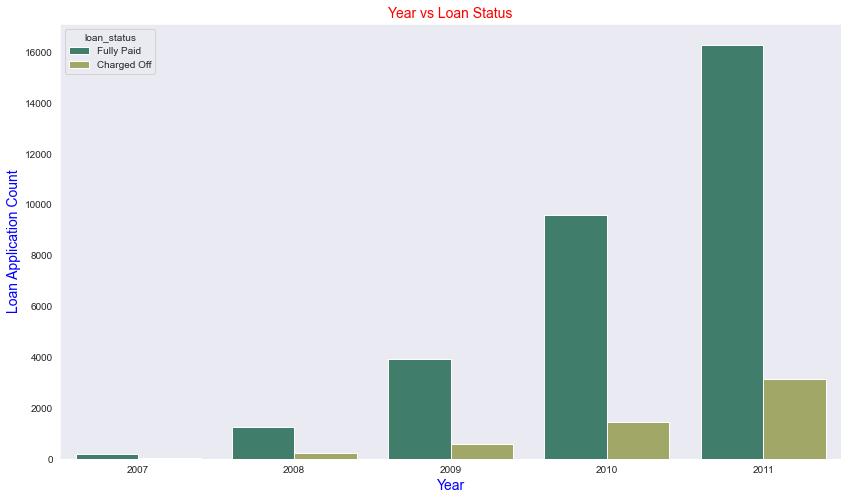

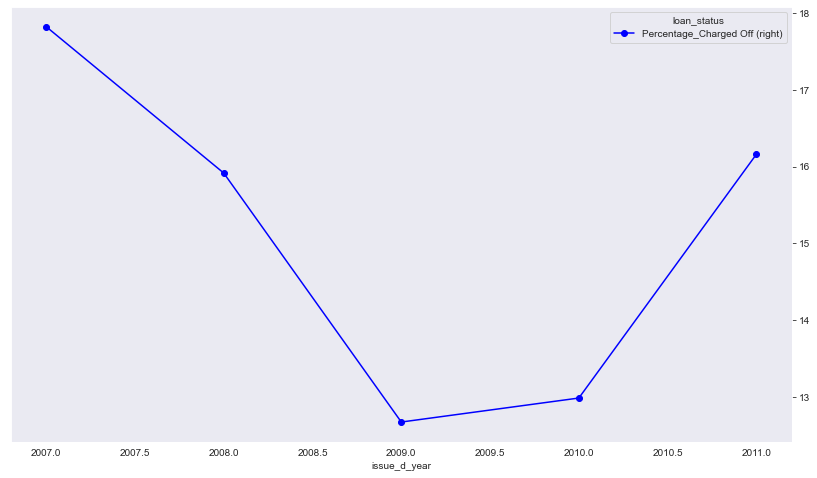

In [1651]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
linePlot_year = crossTab_year[['Percentage_Charged Off']]  


ax = sns.countplot(x="issue_d_year",data=loan_data,hue='loan_status',palette='gist_earth')
ax.set_title('Year vs Loan Status',fontsize=14,color='r')
ax.set_xlabel('Year',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')   

ax2 = linePlot_year.plot(figsize=(14,8) ,marker='o',color = 'b',secondary_y=True)

plt.show()

In [1652]:
crossTab = display_crosstab_vs_loanStatus('issue_d_month')

loan_status    Charged Off  Fully Paid   All  Percentage_Fully Paid  \
issue_d_month                                                         
1              311          1956        2267 86.2810                  
2              282          1969        2251 87.4720                  
3              329          2222        2551 87.1030                  
4              360          2352        2712 86.7260                  
5              453          2335        2788 83.7520                  
6              461          2547        3008 84.6740                  
7              456          2737        3193 85.7190                  
8              450          2764        3214 85.9990                  
9              533          2754        3287 83.7850                  
10             545          2987        3532 84.5700                  
11             580          3240        3820 84.8170                  
12             656          3363        4019 83.6780                  

loan_status    Percentage_Charged Off  
issue_d_month                          
1             13.7190                  
2             12.5280                  
3             12.8970                  
4             13.2740                  
5             16.2480                  
6             15.3260                  
7             14.2810                  
8             14.0010                  
9             16.2150                  
10            15.4300                  
11            15.1830                  
12            16.3220

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       11.0000                11.0000                
mean        85.5975                14.4025                
std         1.0254                 1.0254                 
min         83.2100                12.9340                
25%         85.3785                13.9385                
50%         85.7410                14.2590                
75%         86.0615                14.6215                
max         87.0660                16.7900

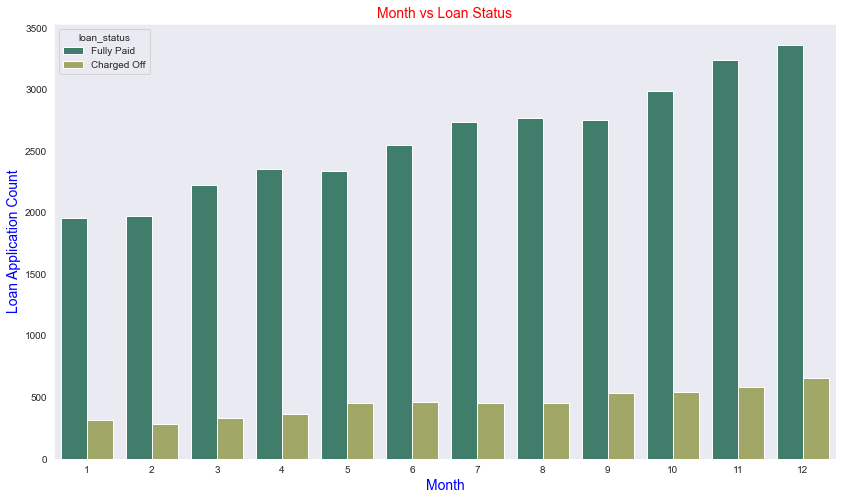

In [1653]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(x="issue_d_month",data=loan_data,hue='loan_status',palette='gist_earth')
ax.set_title('Month vs Loan Status',fontsize=14,color='r')
ax.set_xlabel('Month',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')   
linePlot = crossTab[['Percentage_Charged Off']]  

plt.show()

Obervations for impact of **'Loan Month and Year'** on '**Loan Status**'

- There is a uptrend in both number of **Fully Paid** and **Charge Off** from 2007 to 2011. 
- **Charge Off** Percentage was declining from 2007 to 2009 and it was at the lowest in the year 2009. It started to increse again after 2009.
- Both **Fully Paid** and **Charge Off** steadily grows towards end of the year while december being the month which has most number of loans.
- There is no spikes observed in the middle of the year for **Charge Off**

##  Annual Income vs Loan Status

#### Create Annual income bins for better analysis

- Create bins of 25000 values range for upto 100k.

In [1654]:
#Create bins of 25000 values range for upto 100k.

bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan_data['annual_income_range'] = pd.cut(loan_data['annual_inc'], bins, labels=slot)


In [1655]:

annual_inc_range = display_crosstab_vs_loanStatus('annual_income_range')


loan_status          Charged Off  Fully Paid    All  Percentage_Fully Paid  \
annual_income_range                                                          
0-25000              488          2062        2550  80.8630                  
25000-50000          2125         10714       12839 83.4490                  
50000-75000          1686         9982        11668 85.5500                  
75000-100000         736          5303        6039  87.8130                  
100000 and above     381          3165        3546  89.2550                  

loan_status          Percentage_Charged Off  
annual_income_range                          
0-25000             19.1370                  
25000-50000         16.5510                  
50000-75000         14.4500                  
75000-100000        12.1870                  
100000 and above    10.7450

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       12.0000                12.0000                
mean        85.3813                14.6187                
std         1.3494                 1.3494                 
min         83.6780                12.5280                
25%         84.3738                13.6077                
50%         85.2680                14.7320                
75%         86.3923                15.6262                
max         87.4720                16.3220

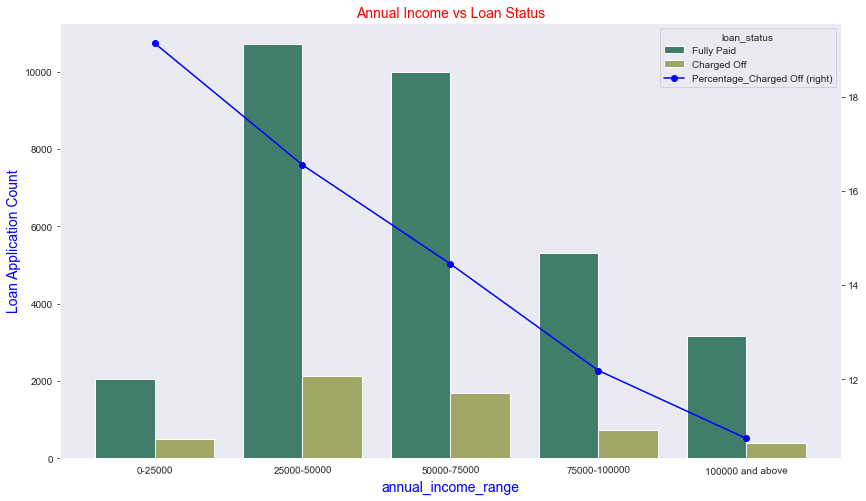

In [1656]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(x="annual_income_range",data=loan_data,hue='loan_status',palette='gist_earth')
ax.set_title('Annual Income vs Loan Status',fontsize=14,color='r')
ax.set_xlabel('Grade',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')   
linePlot = annual_inc_range[['Percentage_Charged Off']]  
ax2 = linePlot.plot(figsize=(14,8),ax = ax,rot=1,secondary_y=True, marker='o',color = 'b')

plt.show()

Obervations for impact of **'Annual Income'** on '**Loan Status**'

- **Charge Off Percentage** decreases with Annual Income, **100000 and above** income band has the lowest Charge Off percentage ( **10.75%**) while annaul income **below 25000** band has the highest Charge Off Percentage(**19.14%**).

##  Interest Rate vs Loan Status

#### Create Interest Rate bin ranges for better analysis

- Create more bins near mean value. (7.5 - 15)


In [1657]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan_data['int_rate_range'] = pd.cut(loan_data['int_rate'], bins, labels=slot)


In [1658]:
int_rate_range = display_crosstab_vs_loanStatus('int_rate_range')


loan_status     Charged Off  Fully Paid   All  Percentage_Fully Paid  \
int_rate_range                                                         
0-7.5           254          4904        5158 95.0760                  
7.5-10          558          6105        6663 91.6250                  
10-12.5         1194         7709        8903 86.5890                  
12.5-15         1437         7032        8469 83.0320                  
15 and above    1705         5071        6776 74.8380                  

loan_status     Percentage_Charged Off  
int_rate_range                          
0-7.5          4.9240                   
7.5-10         8.3750                   
10-12.5        13.4110                  
12.5-15        16.9680                  
15 and above   25.1620

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       12.0000                12.0000                
mean        85.3813                14.6187                
std         1.3494                 1.3494                 
min         83.6780                12.5280                
25%         84.3738                13.6077                
50%         85.2680                14.7320                
75%         86.3923                15.6262                
max         87.4720                16.3220

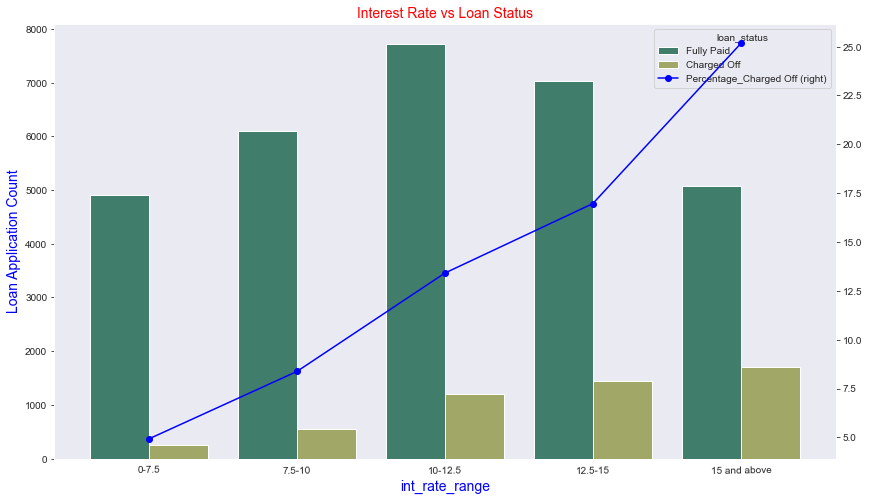

In [1659]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(x="int_rate_range",data=loan_data,hue='loan_status',palette='gist_earth')
ax.set_title('Interest Rate vs Loan Status',fontsize=14,color='r')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')   
linePlot = int_rate_range[['Percentage_Charged Off']]  
ax2 = linePlot.plot(figsize=(14,8),ax = ax,rot=1,secondary_y=True, marker='o',color = 'b')

plt.show()

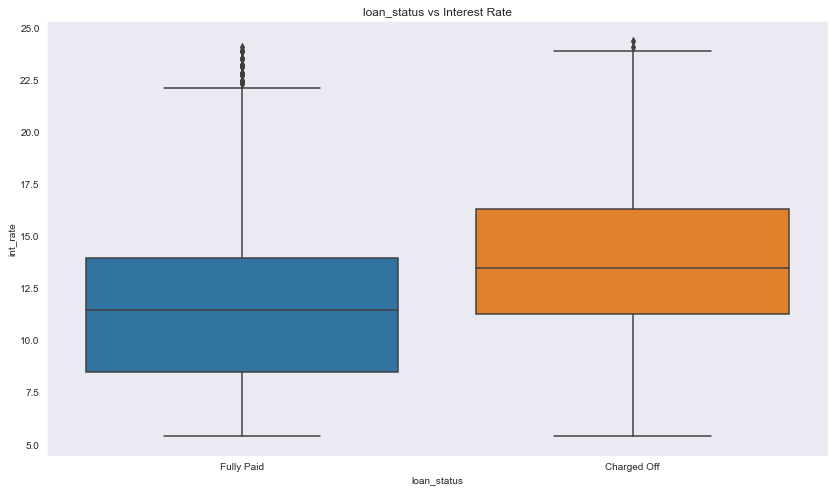

In [1660]:
plt.figure(figsize=(14,8))

sns.boxplot(x='loan_status', y=loan_data.int_rate, data=loan_data)
plt.title('loan_status vs Interest Rate')
plt.show()

Obervations for impact of **'Interest Rate'** on '**Loan Status**'

- **Charge Off Percentage** is increasing with the **Interest Rate** , Interest rate below **7.5%** has the lowest Charge off percentage (**4.92%**) while **15% and above** Interest rates band has highest charge off percentage(**16.32%**).


##  Loan Amount (funded_amnt_inv) vs Loan Status

#### Loan Amount bin ranges for better analysis

- Bins ranages of 5000 recommeded for better distribution of the data.


In [1661]:
bins = [0, 5000, 10000, 15000, 20000, 25000,30000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000' , '30000 and above']
loan_data['loan_amnt_range'] = pd.cut(loan_data['investor_funds'], bins, labels=slot)

In [1662]:
loan_amnt_range = display_crosstab_vs_loanStatus('loan_amnt_range')


loan_status      Charged Off  Fully Paid    All  Percentage_Fully Paid  \
loan_amnt_range                                                          
0-5000           1525         8839        10364 85.2860                  
5000-10000       1589         10765       12354 87.1380                  
10000-15000      1021         6219        7240  85.8980                  
15000-20000      678          3005        3683  81.5910                  
20000-25000      369          1580        1949  81.0670                  
25000-30000      93           423         516   81.9770                  
30000 and above  114          297         411   72.2630                  

loan_status      Percentage_Charged Off  
loan_amnt_range                          
0-5000          14.7140                  
5000-10000      12.8620                  
10000-15000     14.1020                  
15000-20000     18.4090                  
20000-25000     18.9330                  
25000-30000     18.0230                  
30000 and above 27.7370

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       12.0000                12.0000                
mean        85.3813                14.6187                
std         1.3494                 1.3494                 
min         83.6780                12.5280                
25%         84.3738                13.6077                
50%         85.2680                14.7320                
75%         86.3923                15.6262                
max         87.4720                16.3220

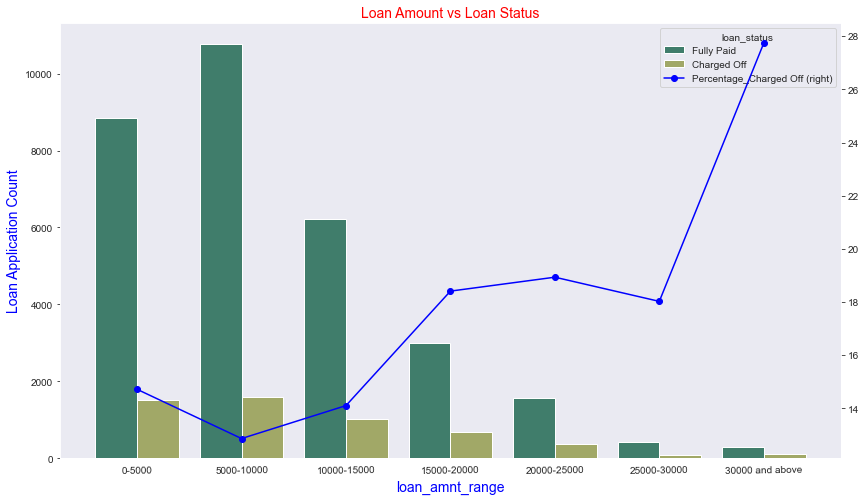

In [1663]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(x="loan_amnt_range",data=loan_data,hue='loan_status',palette='gist_earth')
ax.set_title('Loan Amount vs Loan Status',fontsize=14,color='r')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')   
linePlot = loan_amnt_range[['Percentage_Charged Off']]  
ax2 = linePlot.plot(figsize=(14,8),ax = ax,rot=1,secondary_y=True, marker='o',color = 'b')

plt.show()

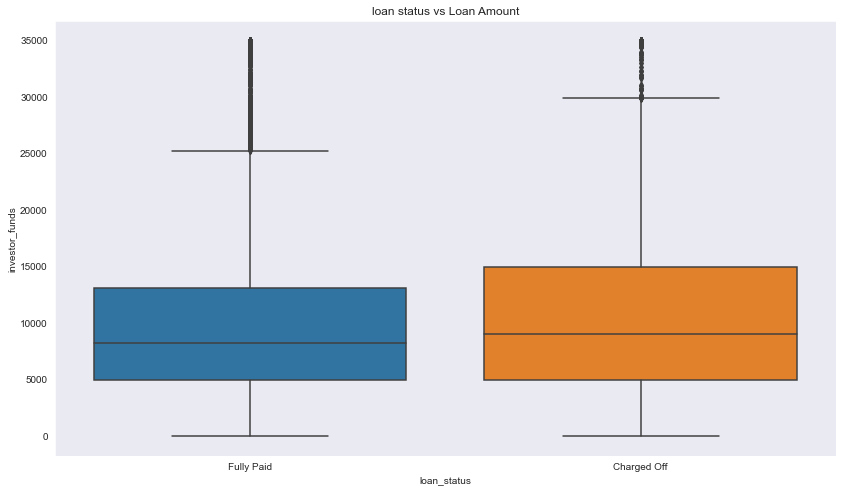

In [1664]:
plt.figure(figsize=(14,8))

sns.boxplot(x='loan_status', y=loan_data.investor_funds, data=loan_data)
plt.title('loan status vs Loan Amount')
plt.show()

Obervations for impact of **'Loan Amount(funded_amnt_inv)'** on '**Loan Status**'

- **Charge Off Percentage** is increasing with the **Loan Amount** , Loan Amount **5000-10000** has the lowest Charge off pecentage (**12.86%**) while **30000 and above** Loan Amount band has hightest charge off percentage(**27.74%**).


##  DTI vs Loan Status

#### DTI Ratio bin ranges for better analysis

###### dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

- Bins ranages of 5 recommeded for better distribution of the data.


In [1665]:
bins = [0.0, 5, 10, 15, 20, 25,30]
slot = ['0-5', '5-10', '10-15', '15-20', '20-25','25 and above']
loan_data['dti_range'] = pd.cut(loan_data['dti'], bins, labels=slot)

In [1666]:
dti_range = display_crosstab_vs_loanStatus('dti_range')


loan_status   Charged Off  Fully Paid   All  Percentage_Fully Paid  \
dti_range                                                            
0-5           561          3886        4447 87.3850                  
5-10          944          6320        7264 87.0040                  
10-15         1347         7818        9165 85.3030                  
15-20         1346         7178        8524 84.2090                  
20-25         1103         5355        6458 82.9200                  
25 and above  87           527         614  85.8310                  

loan_status   Percentage_Charged Off  
dti_range                             
0-5          12.6150                  
5-10         12.9960                  
10-15        14.6970                  
15-20        15.7910                  
20-25        17.0800                  
25 and above 14.1690

loan_status  Percentage_Fully Paid  Percentage_Charged Off
count       12.0000                12.0000                
mean        85.3813                14.6187                
std         1.3494                 1.3494                 
min         83.6780                12.5280                
25%         84.3738                13.6077                
50%         85.2680                14.7320                
75%         86.3923                15.6262                
max         87.4720                16.3220

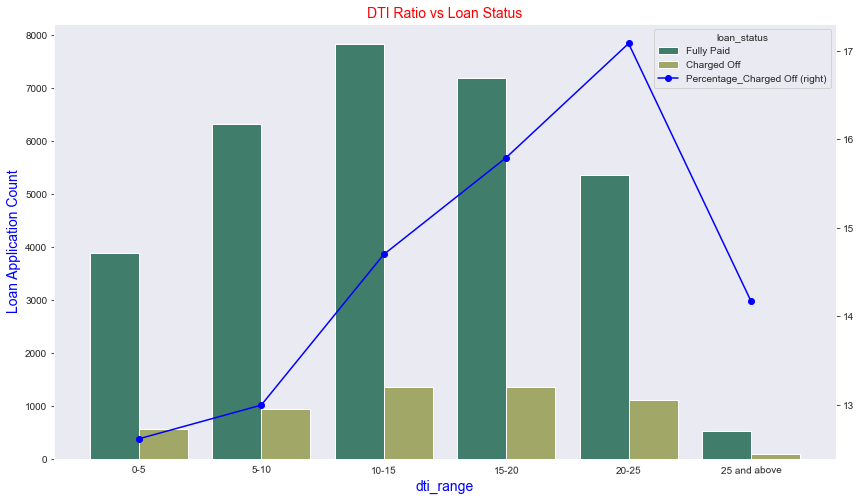

In [1667]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(x="dti_range",data=loan_data,hue='loan_status',palette='gist_earth')
ax.set_title('DTI Ratio vs Loan Status',fontsize=14,color='r')
ax.set_xlabel('DTI Ratio',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')   
linePlot = dti_range[['Percentage_Charged Off']]  
ax2 = linePlot.plot(figsize=(14,8),ax = ax,rot=1,secondary_y=True, marker='o',color = 'b')

plt.show()

Obervations for impact of **'DTI Ratio'** on '**Loan Status**'

- There are less number of loans with with the DTI ratio **25 and above**.
- **Charge Off Percentage** is increasing with the **DTI Ratio** ( excluding DTI Band '**25 and above**' which has low frequency)
- DTI Ratio **0-5** has the lowest Charge off pecentage (**12.61%**) while **20-25** DTI band has hightest charge off percentage(**17.08%**).


### Correlation between numerical variables

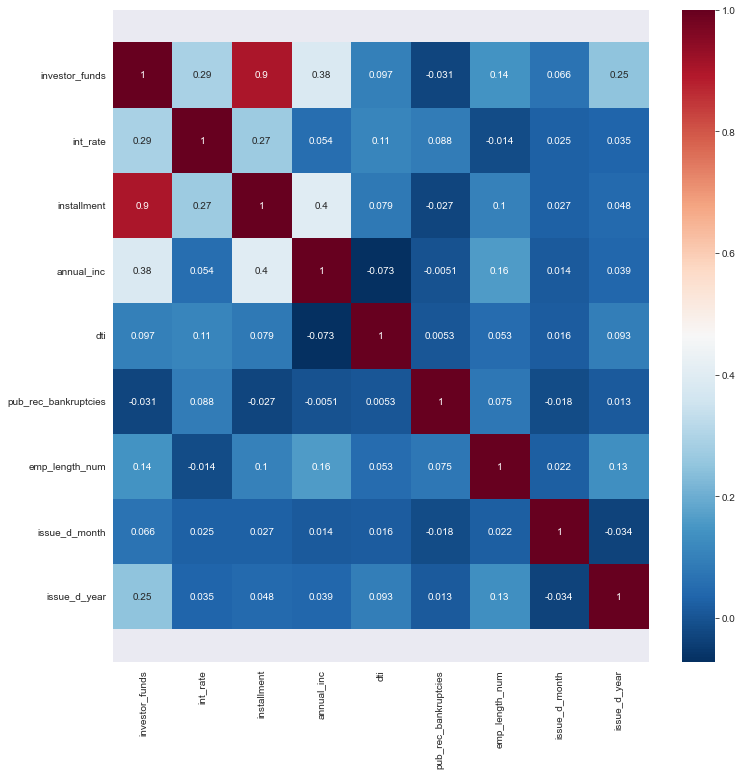

In [1668]:
# Get an high level overview of co-relation between the fields

corr_data = loan_data[['investor_funds', 'int_rate', 'installment', 'annual_inc', 'dti',
       'pub_rec_bankruptcies', 'emp_length_num', 'issue_d_month',
       'issue_d_year']]
plt.figure(figsize=(12,12))
ax = sns.heatmap(corr_data.corr(),annot= True, cmap="RdBu_r")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


Obervations from the heatmap.

- **DTI** is negatively correlated with **Annual Income**.

### Recommendations

- Borrowers with annual income greater than **100000** has lower charge off percentage (**10.75%**) hence Lending Club should consider approve more loan of the applicants with this income band.
- Loan grades **F** and **G** has higher Charge Off rates, especially loan grade **F5** has about **51%** charge Off rates. Lending Club should be cautious in approving these loans. On the other hand, Grade **A** and **B** loans has lower charge off rates specially sub grade A1 has about **2.7%** charge off percentage hence Lending club should consider approving more of these grades.
- **28%** of the **small business** loans are defaulted so Lending Club should be cautious in approving these loans. More **Wedding loans**, **Major Purchase** and **Credit Card loans** can be approved as these has less charge off.
- Loan amounts in the band **5000-10000** has the lower Charge off percentage hence Lending Club should be focusing on approving more loans in this range. On the other hand, loan amount **above 30000** has higher Charge off percentage of **27.7%** hence Lending club should take precaution in approving these loans.
- Borrowers with the DTI ratio **0-5** has the lowest Charge off percentage (**12.61%**) while DIT ratio **more than 20** leads to higher charge off rates (**17.08%**) hence Lending Club should be aware of approving applicants with DTI ratio **above 20**.
- Borrowers who are living in **rental** houses has more Charge Off rates compare to other home ownership applicants, hence Lending club should take extra care while approving loans.
- **Interest rate** **below 7.5%** has the lowest Charge off percentage (**4.92%**) while **'15% and above'** Interest rates band has highest charge off percentage (**16.32%**). Lending Club should consider approving more loans with interest rate **less than 7.5%**.
- **60 Months** loan **term** has higher charge Off percentage (**25.8%**) compare to **36 Months** loan term (**11.2%**) hence Lending Club should consider approving more loans of **36 Months term**.
- Loan application from **NV** has higher charge Off percentage (**22.5%**) while **DC** has the lowest percentage of Charged Off (**6.67%**).
